# <p style="text-align: center;"> <b> Data Exploration and Preprocessing </b></p>

---

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #EDC0C7; font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents ✍️</b></h3>
    
- [1. Data Overview](#1)
    - [1.1 Rows and Columns](#1.1)
    - [1.2 Duplicate Rows](#1.2)
    - [1.3 Data Types](#1.3)

- [2. Data Distribution](#2)
    - [2.1 Numerical Columns](#2.1)
        - [Summary Statistics](#2.1.1)
        - [Histogram](#2.1.2)
    - [2.2 Categorical Columns](#2.2)
    - [2.3 Missing Values, Abnormal Values and Outliers](#2.3)
        - [Missing Values](#2.3.1)
        - [Abnormal Values and Outliers](#2.3.2)

- [3. Data Visualization](#3)
    - [Top 10 manga series with the highest score](#3.1)
    - [Top 10 longest-running manga series](#3.2)
    - [Top 10 most favorite manga series](#3.3)

- [4. Summary](#4)
- [5. Save Processed Data](#5)


## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">0. Import libraries </div>

👉 These are the main libraries used for data exploration:
+ `numpy`: used for mathematical operations on matrices
+ `pandas`: used to store data from `.csv` files and operate functions on DataFrame
+ `matplotlib`: used to visualize data
+ `seaborn`: used to visualize data
+ `ast`:  used for literal_eval to safely evaluate strings containing Python expressions
+ `re`: used for regular expressions to extract, parse, clean strings
+ `parse` from `dateutil.parser`: used for parsing date strings
+ `datetime` from `datetime`: Provides classes for working with dates and times

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime as dt
import ast
import re

# Disable copy warning
pd.options.mode.chained_assignment = None 

# Disable future warnings and user warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


<a class="anchor" id="#1"></a>

## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">1. Data Overview  </div>

In [2]:
manga_df = pd.read_csv('../data/raw_comic.csv')
manga_df.head()

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Published,Genres,Themes,Author,Total Review,Type Review
0,Berserk,9.47,331288,1,1,"665,300","122,841",Unknown,Unknown,Publishing,"Aug 25, 1989 to ?","['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...","Miura, Kentarou (Story & Art), Studio Gaga (Art)",258,"[233, 15, 10]"
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156368,2,26,"256,146","42,864",24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","['Action', 'Adventure', 'Mystery', 'Supernatur...",[],"Araki, Hirohiko (Story & Art)",128,"[120, 7, 1]"
2,Vagabond,9.24,136403,3,15,"364,891","40,158",37,327,On Hiatus,"Sep 3, 1998 to May 21, 2015","['Action', 'Adventure', 'Award Winning']","['Historical', 'Samurai']","Inoue, Takehiko (Story & Art), Yoshikawa, Eiji...",97,"[88, 8, 1]"
3,One Piece,9.22,366668,4,3,"599,278","114,531",Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","['Action', 'Adventure', 'Fantasy']",[],"Oda, Eiichiro (Story & Art)",206,"[173, 17, 16]"
4,Monster,9.15,93945,5,29,"236,355","20,501",18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","['Award Winning', 'Drama', 'Mystery']","['Adult Cast', 'Psychological']","Urasawa, Naoki (Story & Art)",76,"[64, 7, 5]"


<a class = "anchor" id = "1.1"></a>
## <span style='color:#2B9C15 '> 1.1 Rows and Columns </span>

### 👉 **Total number of rows and columns of data** 

In [3]:
n_rows , n_cols = manga_df.shape
print(f'There are {n_rows} rows and {n_cols} columns in the dataset')

There are 10000 rows and 16 columns in the dataset


### 👉 **Meaning of each row and each column** 

+ Each rows in the dataset represents information of a manga series in top 10000 manga series on MyAnimeList

+ The following is the meaning of each column in the data


| **COLUMN**            |**MEANING**               |
|:----------------------|:-------------------------------------------------------------|
|**`Title`**            | Title of the manga (written in English phonetic)                                                |
|**`Score`**            | Score on the MyAnimeList site (MAL)                                                             |
|**`Vote`**             | Number of readers voting for the manga                                                          |
|**`Ranked`**           | Ranking of manga on the web MyAnimeList (MAL)                                                   |
|**`Popularity`**       | The popularity of the manga                                                                     |
|**`Members`**          | Number of readers who have this manga in their list                                             |
|**`Favorite`**         | Number of readers who love this manga                                                           |
|**`Volumes`**          | Number of volumes of manga                                                                      |
|**`Chapters`**         | Number of chapters of manga                                                                     |
|**`Status`**           | Status of the manga (ongoing, completed, on hiatus,...)                                         |
|**`Published`**        | Release time to the end time of the manga                                                       |
|**`Genres`**           | Genres of manga                                                                                 |
|**`Themes`**           | The themes of the manga                                                                         |
|**`Author`**           | Author of manga                                                                                 |
|**`Total Review`**     | Number of readers leaving comments on the manga                                                 |
|**`Type Review`**      | Number of readers for each comment category (Recommended / Mixed feeling / Not recommended)     |
  

<a class = "anchor" id = "1.2"></a>
## <span style='color:#2B9C15 '> 1.2 Duplicate Rows </span>

### 👉 **Check and handle duplicates rows** 

In [4]:
duplicated_rows = manga_df.duplicated().sum()

if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the DataFrame is unique.')
    print('So that we do not need to continue processing duplicate lines')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows')
    manga_df = manga_df.drop_duplicates()
    print(f'After drop duplicated rows, there are {manga_df.shape[0]} rows left')

There are 1 rows that are duplicated so we need to drop those 1 rows
After drop duplicated rows, there are 9999 rows left


<a class = "anchor" id = "1.3"></a>
## <span style='color:#2B9C15 '> 1.3 Data Types </span>

In this section, we will **check the current data types** of each column and **convert them to the correct data type** if necessary.

### 👉 **Check the current data types of each column**

First we calculate the data type (dtype) of each column in `manga_df` by using `dtypes` function of `pandas` library.

In [5]:
manga_df.dtypes.to_frame('Data Type')

,Data Type
Title,object
Score,float64
Vote,int64
Ranked,int64
Popularity,int64
Members,object
Favorite,object
Volumes,object
Chapters,object
Status,object


To better understand columns of type `object`, we will analyze them into each subtype using function `open_object_dtype()`

In [6]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

manga_df.apply(open_object_dtype, axis=0)

Title                            {<class 'str'>}
Score                          {<class 'float'>}
Vote                             {<class 'int'>}
Ranked                           {<class 'int'>}
Popularity                       {<class 'int'>}
Members                          {<class 'str'>}
Favorite                         {<class 'str'>}
Volumes                          {<class 'str'>}
Chapters                         {<class 'str'>}
Status                           {<class 'str'>}
Published                        {<class 'str'>}
Genres                           {<class 'str'>}
Themes                           {<class 'str'>}
Author          {<class 'str'>, <class 'float'>}
Total Review                     {<class 'int'>}
Type Review                      {<class 'str'>}
dtype: object

Let's evaluate the data types of columns in our dataset to ensure appropriateness:

+ Suitable Types: `Title`, `Score`, `Vote`, `Ranked`, `Popularity`, `Status` and `Total Review`

+ Need Conversion to **int**: `Members`, `Favorite`, `Volumes` and `Chapters`

+ Need Conversion to **list**: `Type Review`, `Genres`, `Themes` and `Author` 

+ Need Conversion to **datetime**: `Published`

### 👉 **Convert data types**

Firstly, converting the data type of the columns to **int / float**

In [7]:
# Convert to int
manga_df['Members'].replace(',','', regex=True, inplace=True)
manga_df['Favorite'].replace(',','', regex=True, inplace=True)
manga_df['Members'] = pd.to_numeric(manga_df['Members'], errors='coerce')
manga_df['Favorite'] = pd.to_numeric(manga_df['Favorite'], errors='coerce')

# Convert to float because type int does not contain NaN values
manga_df['Volumes'] = pd.to_numeric(manga_df['Volumes'], errors='coerce')
manga_df['Chapters'] = pd.to_numeric(manga_df['Chapters'], errors='coerce')


Let's check again data type of `Members`, `Favorite`, `Volumes` and `Chapters`

In [8]:
check = ['Members', 'Favorite', 'Volumes', 'Chapters']
manga_df[check].dtypes

Members       int64
Favorite      int64
Volumes     float64
Chapters    float64
dtype: object

The two columns `Volumes` and `Chapters` have the value `NaN` so they cannot be converted to `int`. Temporarily leave these 2 columns in `float` style and will convert them again after handling the missing value.

Secondly, converting the data type of the columns to **list**

In [9]:
list_col = ['Genres', 'Themes', 'Type Review']
for col in list_col:
    manga_df[col] = manga_df[col].apply(ast.literal_eval)

+ Examining the `Type Review` column, we see a complex data type— a list of three numbers representing the counts of comments categorized as `Recommended`, `Mixed feelings`, and `Not recommended`.
- For future analysis and ease of access, we will divide `Type Review` into 3 new columns: `Recommended`, `Mixed Feelings` and `Not Recommended`.
+ Subsequently, upon creating the new columns, we will validate the integrity of the data in these three columns. Once confirmed, we intend to remove both the original `Type Review` and the derived `Total Review` (sum of the three new columns) to avoid redundancy.

In [10]:
manga_df['Recommended'] = manga_df['Type Review'].apply(lambda x: x[0])
manga_df['Mixed Feelings'] = manga_df['Type Review'].apply(lambda x: x[1])
manga_df['Not Recommended'] = manga_df['Type Review'].apply(lambda x: x[2])

Before deleting column `Total Review`, we check whether the data collected is reasonable

In [11]:
def checking_reviews(df: pd.DataFrame) -> bool:
    '''
    Check if the sum of the three columns Recommended, Mixed Feelings, Not Recommended is equal to the Total Review column
    
    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame that we want to check
    
    Returns
    -------
    bool
        True if the sum of the three is equal to the Total Review column, False otherwise
    '''
    return df["Total Review"].equals((df["Recommended"] + df["Mixed Feelings"] + df["Not Recommended"]))

checking_reviews(manga_df)==True

True

After confirming that the Total Review column is indeed the sum of the newly created columns (as verified above), we will delete the `Total Review` column from the data.

In [12]:
manga_df = manga_df.drop(columns=['Type Review', 'Total Review'])

Let's check the data type of the 3 newly created columns

In [13]:
check = ['Recommended', 'Mixed Feelings', 'Not Recommended']
manga_df[check].dtypes

Recommended        int64
Mixed Feelings     int64
Not Recommended    int64
dtype: object

About the columns `Author` we need to standardize the author names in the dataset using the function `extract_author_name()`. This function will ensure a consistent format for author names, regardless of the various styles they may have initially.`

In [14]:
def extract_author_names(text):
    # Replace the commas separating last names from first names with a space
    text = re.sub(r'\,\s', ' ', text).strip()
    # Remove roles within parentheses, including the parentheses
    text = re.sub(r'\s*\([^)]*\)', ' ', text).strip()
    # Split the string by a comma followed by a space, which now only occurs between individuals
    return text.split('  ')


manga_df['Author'] = manga_df['Author'].replace(to_replace=np.nan, value='')
# Apply the function to each row in the 'Author' column
manga_df['Author'] = manga_df['Author'].apply(extract_author_names)

Thirdly, converting the data type of the columns to **datetime**

- Due to the complexity of storing information in the `Published` column, which represents a range from release date to end date, we intend to enhance data handling by splitting this column into two new ones: `Release date` and `Completed date`.

- Following this operation, we will remove the original `Published` column to avoid redundancy.

In [15]:
start = []
end = []

for row in manga_df['Published']:
    if ' to ' in row:
        s, e = row.split(' to ')

        if s.isdigit() and e.isdigit():
            s = f"01 Jan, {s}"
            e = f"01 Jan, {e}"
        elif len(s.split()) == 2 and len(e.split()) == 2:
            s = f"{s}, {dt.now().year}"
            e = f"{e}, {dt.now().year}"

    elif row.isdigit():
        s = f"01 Jan, {row}"
        e = np.nan
    else:
        try:
            s = parse(row, fuzzy=True)
            e = np.nan
        except ValueError:
            s = np.nan
            e = np.nan

    start.append(s)
    end.append(e)

date_df = pd.DataFrame({'Release date': start, 'Completed date': end})

# Assigning the new columns to manga_df
manga_df['Release date'] = date_df['Release date']
manga_df['Completed date'] = date_df['Completed date']

# Convert 'Release date' and 'Completed date' to datetime64 and set time to midnight
manga_df['Release date'] = pd.to_datetime(manga_df['Release date'], errors='coerce').dt.normalize()
manga_df['Completed date'] = pd.to_datetime(manga_df['Completed date'], errors='coerce').dt.normalize()

# Dropping the original 'Published' column
manga_df = manga_df.drop(columns='Published')

Let's check data type of `Release date` and `Completed date`

In [16]:
check = ['Release date', 'Completed date']
manga_df[check].dtypes

Release date      datetime64[ns]
Completed date    datetime64[ns]
dtype: object

Now, checking all data type columns after conversion

In [17]:
manga_df.apply(open_object_dtype)

Title                                                {<class 'str'>}
Score                                              {<class 'float'>}
Vote                                                 {<class 'int'>}
Ranked                                               {<class 'int'>}
Popularity                                           {<class 'int'>}
Members                                              {<class 'int'>}
Favorite                                             {<class 'int'>}
Volumes                                            {<class 'float'>}
Chapters                                           {<class 'float'>}
Status                                               {<class 'str'>}
Genres                                              {<class 'list'>}
Themes                                              {<class 'list'>}
Author                                              {<class 'list'>}
Recommended                                          {<class 'int'>}
Mixed Feelings                    

<a class = "anchor" id = "2"></a>

## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">2. Data Distribution </div>
To explore the distribution of columns, we will follow these steps:

- Numerical columns: 
    - Calculate and interpret **summary statistics** of the columns
    - Plot **histograms** to better understand the distribution of the columns

- Categorical columns:
    - Calculate number of **unique values** in each column
    - Plot **charts** to better understand the distribution of the columns

- Abnormal values, missing values and outliers:
    - Calculate number of missing values per column, per row and handle them
    - Identify and handle abnormal values and outliers


<a class = "anchor" id = "2.1"></a>
## <span style='color:#2B9C15 '>2.1 Numerical Columns </span>

Columns have numeric data types: 

|**Name**|**Data Type**|
|:---|:---|
|`Score`|float64|
|`Vote`|int64|
|`Ranked`|int64|
|`Popularity`|int64|
|`Members`|int64|
|`Favorite`|int64|
|`Volumes`|int64|
|`Chapters`|int64|
|`Release date`|datetime64[ns]|
|`Completed date`|datetime64[ns]|

### 👉 **Summary Statistics** <a class = "anchor" id = "2.1.1"></a>

For columns with numeric data types, we will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile 
- The median 
- The upper quartile 
- The max

We will save the results to a DataFrame `num_col_dist_df`, where:
- The names of the columns are the names of the numeric columns in `manga_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  


In [18]:
numeric_cols = manga_df.select_dtypes(exclude=['object']).columns
num_col_dist_df = manga_df[numeric_cols].copy()
missing_percentage = num_col_dist_df.isna().mean() * 100

num_col_dist_df = num_col_dist_df.describe(percentiles=[.25, .5, .75]).round(2)
num_col_dist_df.loc['missing ratios'] = missing_percentage
num_col_dist_df

,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Recommended,Mixed Feelings,Not Recommended,Release date,Completed date
count,9999.00,9999.00,9999.00,9999.00,9999.00,9999.00,7367.000000,7466.000000,9999.00,9999.00,9999.00,8379,6192
mean,7.37,3482.80,5000.80,8707.68,8762.56,346.27,6.650000,47.820000,2.95,0.50,0.31,2012-02-15 21:26:11.213748736,2012-06-18 10:11:37.674418688
min,6.91,101.00,1.00,1.00,193.00,0.00,1.000000,1.000000,0.00,0.00,0.00,1950-01-15 00:00:00,1951-02-20 00:00:00
25%,7.08,316.00,2500.50,3099.50,1127.00,6.00,2.000000,8.000000,0.00,0.00,0.00,2008-02-22 00:00:00,2008-12-08 18:00:00
50%,7.28,786.00,5000.00,7345.00,2465.00,19.00,4.000000,23.000000,1.00,0.00,0.00,2013-04-05 00:00:00,2013-10-27 00:00:00
75%,7.56,2232.50,7501.50,13222.00,6349.00,74.00,9.000000,56.000000,3.00,0.00,0.00,2018-02-27 12:00:00,2018-05-01 06:00:00
max,9.47,400404.00,10004.00,33358.00,665300.00,122841.00,200.000000,1957.000000,280.00,56.00,112.00,2023-11-27 00:00:00,2023-11-27 00:00:00
std,0.38,13940.43,2887.48,6663.59,27600.91,2732.54,8.240000,77.790000,9.04,1.94,1.85,NaN,NaN
missing ratios,0.00,0.00,0.00,0.00,0.00,0.00,26.322632,25.332533,0.00,0.00,0.00,16.20162,38.073807


As we can see:
+ About **missing percentage**:
     + All columns except `Volumes`, `Chapters`, `Release date` and `Completed date` have full data (missing rate = 0%)
    
     + The column `Volumes` has **26.3%** of the total values missing. While the `Chapters` column is **25.3%**. It can be seen that the missing rate of these two columns is not too high and is acceptable. Columns `Volumes` and `Chapters` are missing mainly due to their `Status` (incomplete, on hold, on hiatus,...), because these two columns only display volume and chapter numbers when the manga is completed (or stopped indefinitely).
    
     + `Release date` is missing **16.2%** of the data, likely because the information is not available, missing or not recorded.
    
     + `Completed date` is missing a lot, more than **38.07%**. The reason may be that the manga is not completed or there is no information.
     
+ About **min**, **median** (50%), **lower quartile** (25%), **upper quartile** (75%) and **max**:
     + Except for the `Score` column, numeric columns all have very wide ranges.
     
     + The `Score` column has narrow range from 6.9 to 9.4. This is a reasonable range because the dataset is the top 10000 manga series on MyAnimeList, so the score is quite high.

     + The manga series in the dataset have release dates spanning from 1950 to 2023.
     
     + If the manga series in the data have been completed, they were all completed between 1951 and November 2023 (the time the data was collected).

To better understand the reason for missing values of the columns `Volumes`, `Chapters`, `Release date` and `Completed date`, we will consider these columns in each case of the column `Status`:

Missing manga `Volumes` number column grouped by `Status`:

In [19]:
status, missing = np.unique(manga_df['Status'][manga_df['Volumes'].isna()], return_counts=True)
missing_by_status = pd.DataFrame({'Status':status, 'Missing Rows':missing})
missing_by_status

,Status,Missing Rows
0,Discontinued,2
1,Finished,632
2,On Hiatus,7
3,Publishing,1991


Missing manga `Chapters` number column grouped by `Status`:

In [20]:
status, missing = np.unique(manga_df['Status'][manga_df['Chapters'].isna()], return_counts=True)
missing_by_status = pd.DataFrame({'Status':status, 'Missing Rows':missing})
missing_by_status

,Status,Missing Rows
0,Discontinued,1
1,Finished,524
2,On Hiatus,18
3,Publishing,1990


+ As mentioned above, the manga is missing chapters or volumes mainly because the manga is not completed (Publishing). Chapters` and `Volumes` will be updated when the manga is completed or discontinued.

+ For manga that only have `Chapters` but no `Volumes`, the biggest reason is one-shot manga series (series with only 1 chapter) so there will be no volumes. Such one-shot manga make up a large proportion on MAL.

+ For manga that only have `Volumes` but no `Chapters`, the biggest reason is that light novels (light_novels or novels) are often published in volumes and the author does not divide chapters when writing. There are also many novel series on MAL.

+ The remaining small part is missing because the MAL website does not have enough information about the manga.

### **Histogram** <a class = "anchor" id = "2.1.2"></a>

**`Score` & `Popularity`**

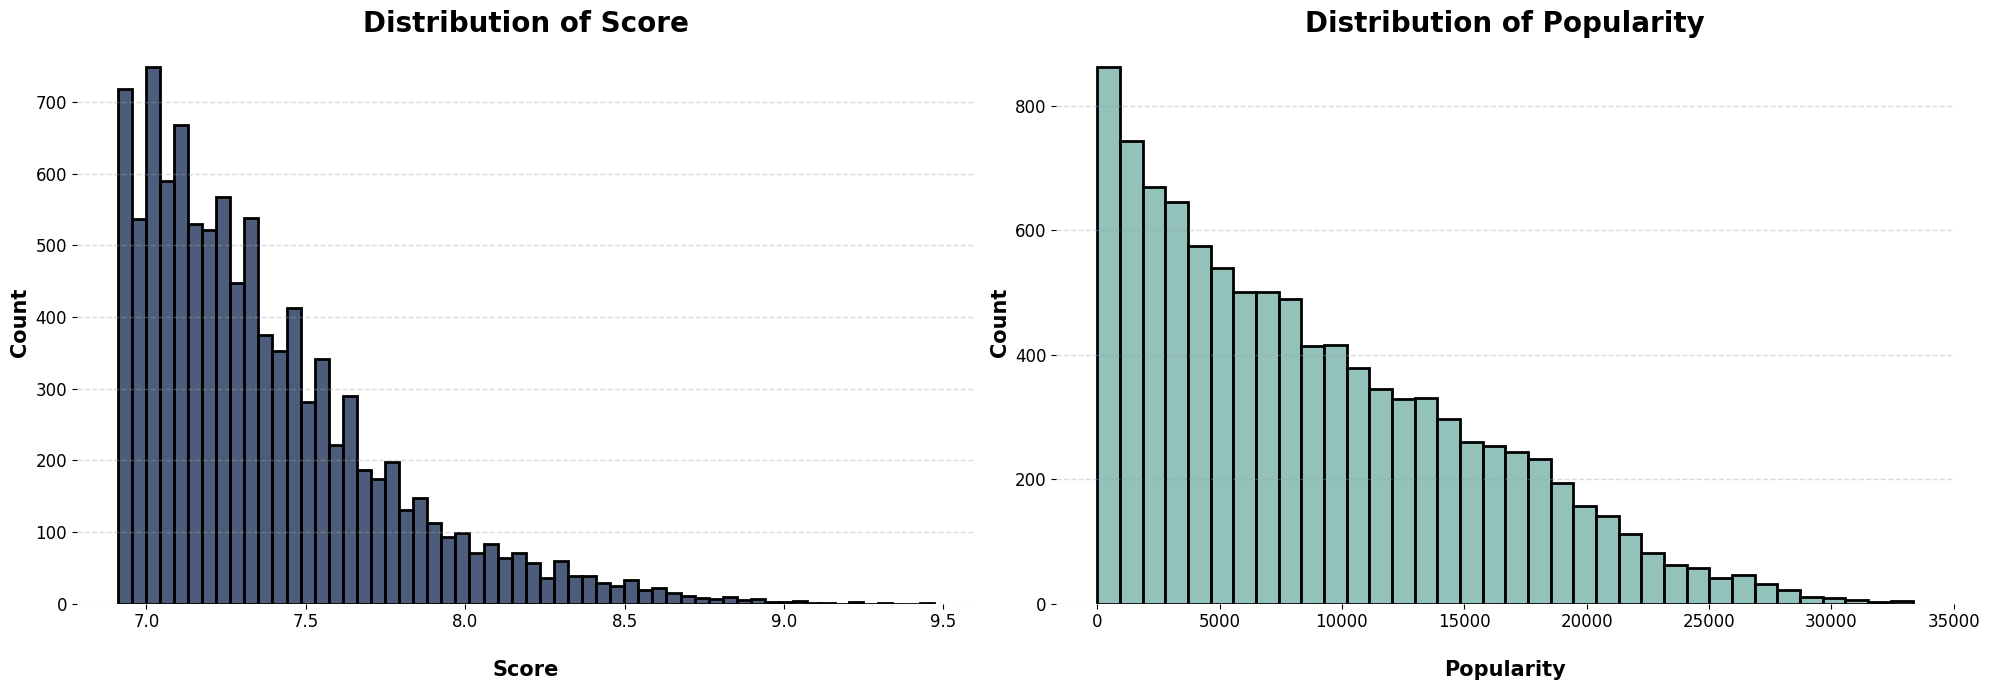

In [21]:
col = ['Score', 'Popularity']
color = ["#11264e","#6faea4"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

for i in range(2):
    p = sns.histplot(data=manga_df[col[i]], ax=ax[i], color=color[i], linewidth=2)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"\n{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.axes.tick_params(labelsize=12)
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### 📖 **COMMENTS:**

- Score:
    - Scores of manga range from 6.8 to 7.3 at most. Notably, the most common score is 7, with over 700 mangas attaining this rating.
    - As the score increases, the number of mangas achieving that score decreases. Scores between 9 and 9.5 are quite rare, with just over 10 mangas reaching such high ratings.
- Popularity:
    - The popularity distribution indicates that the majority of manga fall within the range of 0 to 5000, encompassing over 600 to 800 mangas.
    
Both charts display a right-skewed distribution, resembling the shape of the lower half of a normal distribution. This skewness is expected given that the dataset comprises the top 10,000 mangas with the highest scores on MyAnimeList.


**`Release date`** & **`Completed date`**

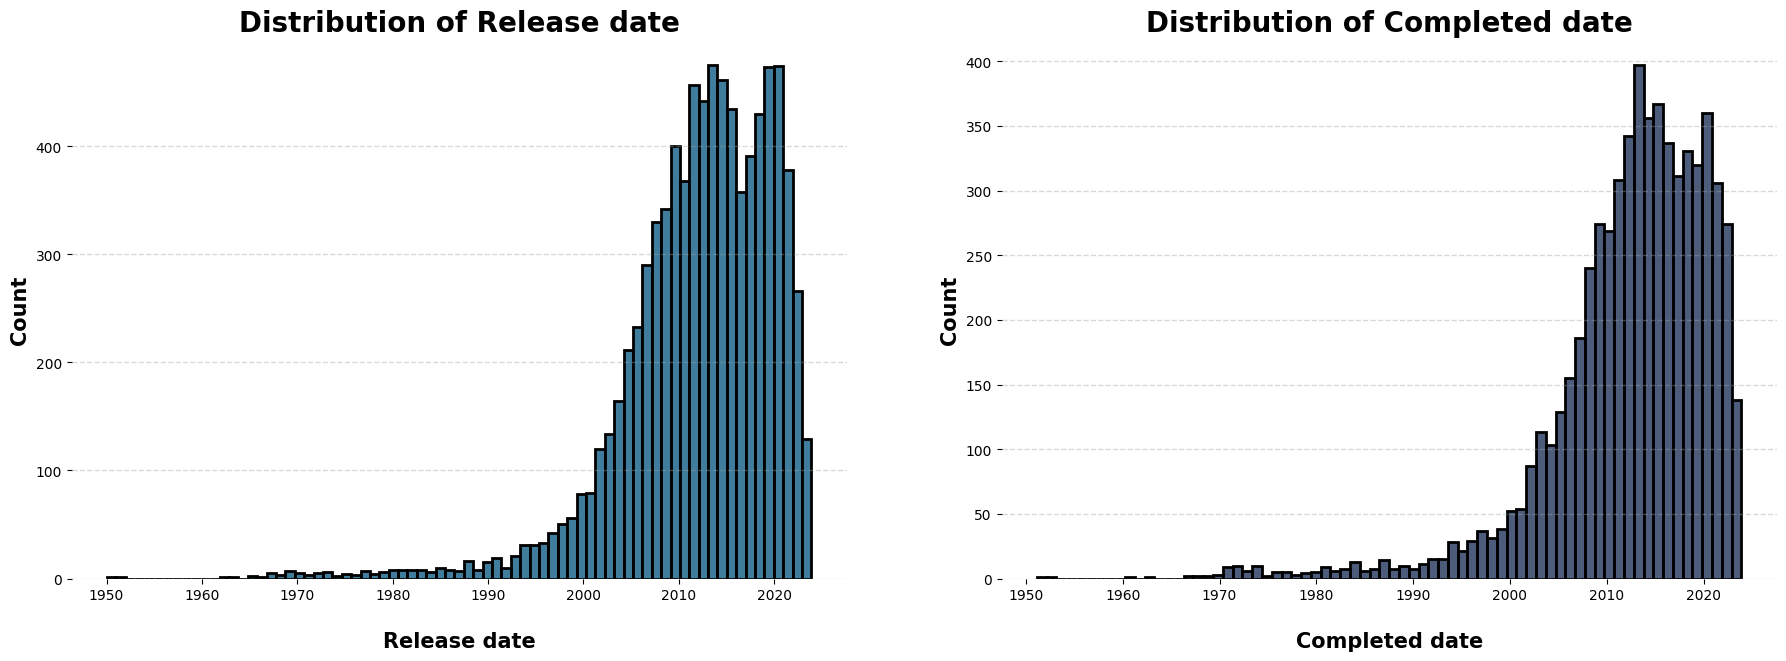

In [22]:
col = ['Release date', 'Completed date']
color = ["#00507A","#11264e"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 7))

for i in range(2):
    p = sns.histplot(data=manga_df[col[i]], ax=ax[i], color=color[i], linewidth=2)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"\n{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

### 📖 **COMMENTS:**
+ Release date:
    + From 2010 to 2015 and from 2018 to 2020 is the period with the most manga series released - more than 400 manga series released.
    + Before 2000, it seemed like manga was not very popular and well known, so the number of manga released in those years was the least.
    + By 2023, more than 100 manga series have been released this year
+ Completed date:
    + From 2010 to 2020 is the period when the most manga series were completed - more than 300 per year.
    + By 2023, more than 100 manga series have been completed this year

The two graphs above both have a left-sided distribution, but this can be explained by the historical development of the manga industry. Before 2000, manga was not popular and well known, so the number of manga released and completed in those years was the least. From 2010 to 2020, the manga industry grew strongly, so the number of manga released and completed in those years was the most.

**`Recommended`**,**`Mixed Feelings`** and **`Not Recommended`**

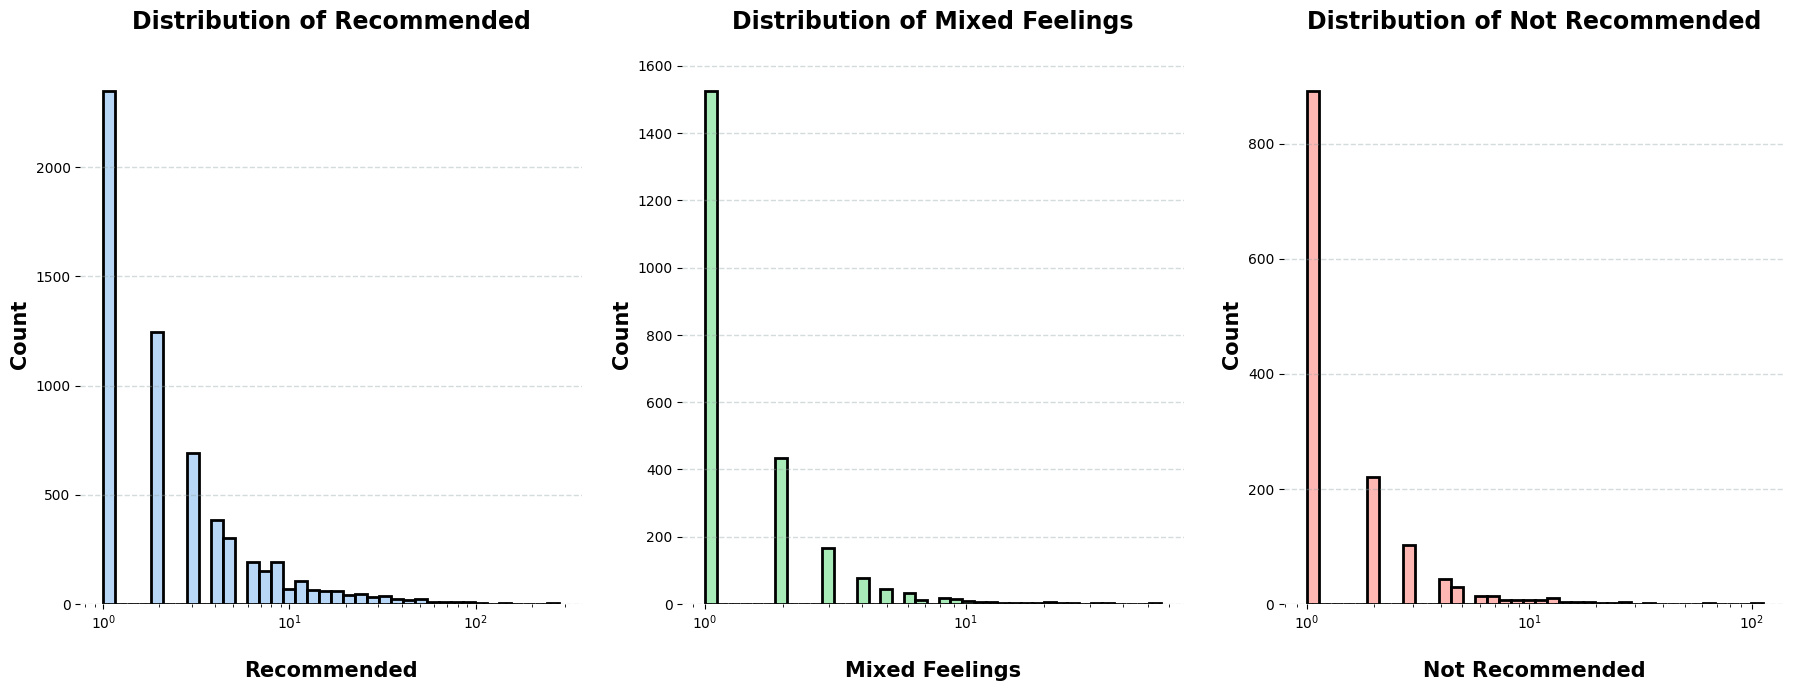

In [23]:
col = ['Recommended','Mixed Feelings','Not Recommended'] 
color = ['#a1c9f4', '#8de5a1', '#ff9f9b']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))

for i in range(3):
    p = sns.histplot(data=manga_df[col[i]], ax=ax[i], color=color[i], linewidth=2, log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}\n",fontsize=17, color='k', weight='bold')
    p.axes.set_xlabel(f"\n{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

### 📖 **COMMENTS:**
+ The distribution of the above 3 columns is quite similar.
+ Many manga series are not commented on by readers - more than 2000 mangas. From there, it can be seen that most readers are quite shy about writing a review for a series, unless they really like or dislike it.
+ Most manga series only have less than 10 comments from readers.

**`Volumes`** and **`Chapters`**

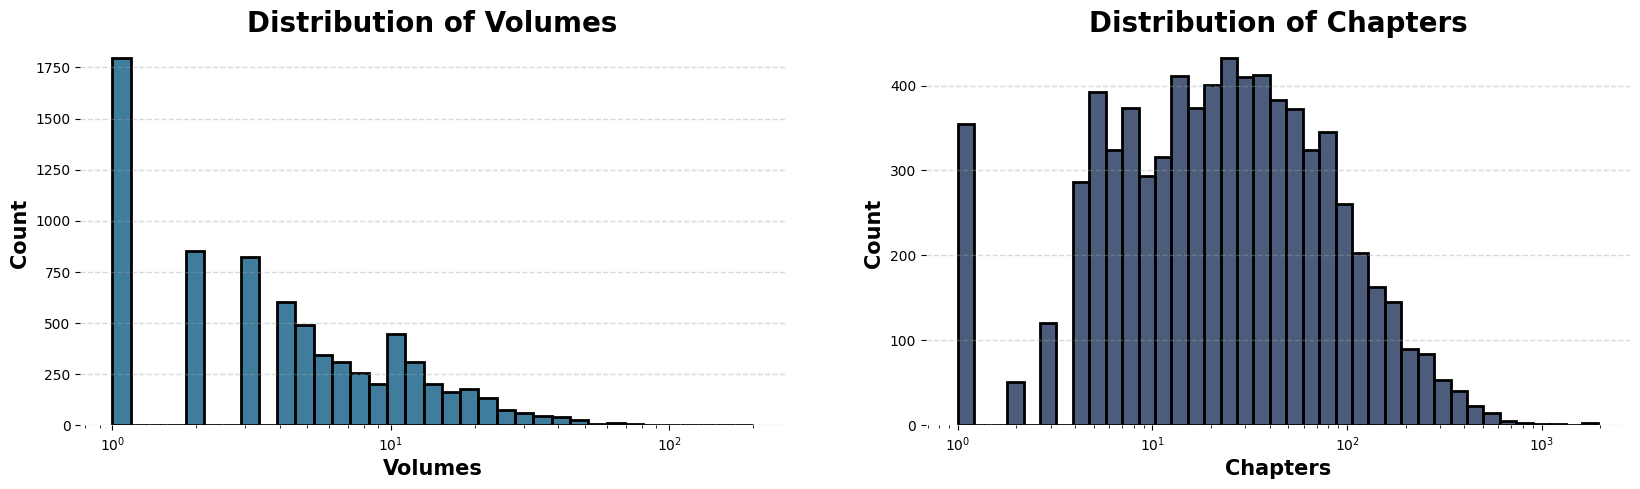

In [24]:
col = ['Volumes','Chapters']
color = ["#00507A","#11264e"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i in range(2):
    p = sns.histplot(data=manga_df[col[i]], ax=ax[i], color=color[i], linewidth=2, log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

### 📖 **COMMENTS:**
+ Volumes:
    + Most manga series have less than or equal to 10 volumes. Very few mangas have more than 10 volumes.
    + This is understandable because a volume includes many chapters, so almost no manga has 100 volumes.

+ Chapters:
    + In contrast to Volumes, manga series will usually have from 10 to 100 chapters - about more than 300 mangas.
    + There are still 1 to 2 mangas that have more than 1000 chapters.

**`Vote`**, **`Members`**, **`Favorite`** and **`Ranked`**

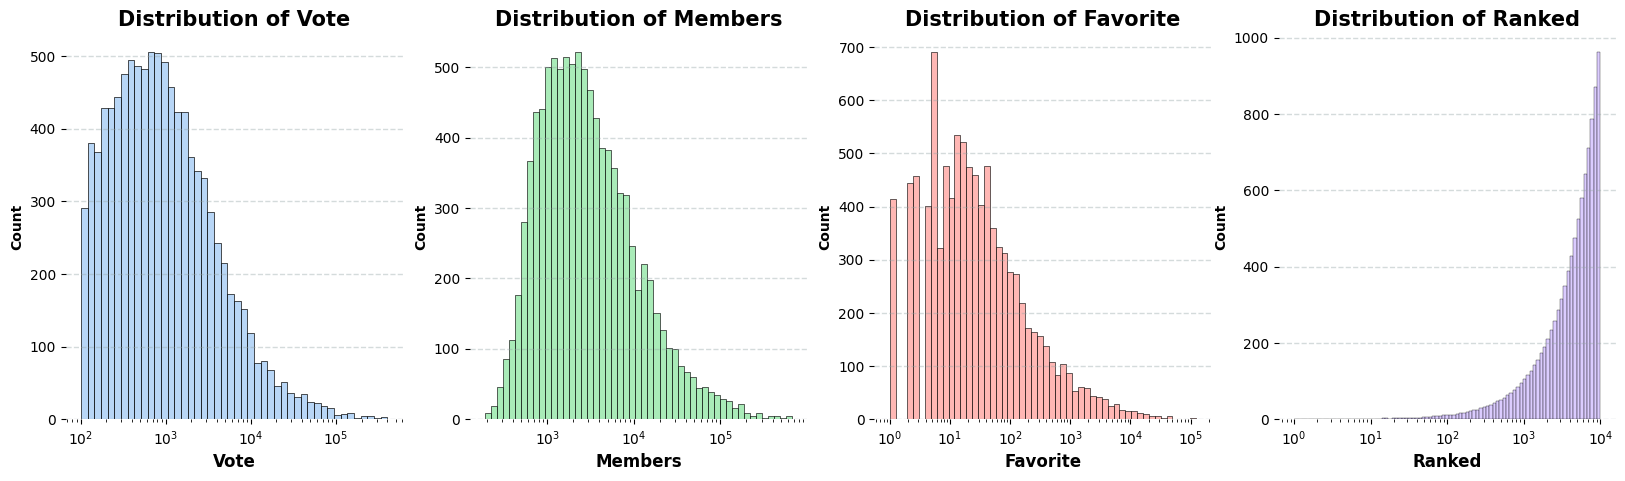

In [25]:
col = ['Vote','Members','Favorite','Ranked']
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for i in range(4):
    p = sns.histplot(data=manga_df[col[i]], ax=ax[i], color=color[i], log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=15, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}",fontsize=12, weight='bold')
    p.axes.set_ylabel('Count',fontsize=10, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

### 📖 **COMMENTS:**
+ Vote:
    + Most manga series have votes ranging from 500 to 1000.
    + No manga series has less than 100 votes. This is understandable because the dataset is the top 10000 manga series on MyAnimeList, so the number of votes is quite high.
    + There are about 10 manga series with over 100,000 votes

+ Members:
    + More than 500 manga series added to their reading lists by 1,000 to 10,000 readers. This range is the most common range.
    + There are about 10 mangas that more than 700,000 readers added to their reading lists. These are the books with the most Members.
  
+ Favorite:
    + Most manga series have about 10 to 100 readers adding them to their favorites list.
    + More than 700 manga series had fewer than 10 readers added to their favorites list.
    + There are still series that have been added to their favorites list by more than 10,000 readers, but these are only very small numbers.

+ Ranked: The shape of Ranked's distribution is very even, left-skewed, and almost completely matches the lower half of the normal distribution. This can be explained because the data is taken from the top 10,000 manga series on MyAnimeList.

<a class = "anchor" id = "2.2"></a>
## <span style='color:#2B9C15 '> 2.2 Categorical Columns </span>

Columns have non-numeric data types: 

|**Name**|**Data Type**|
|:---|:---|
|`Title`|object|
|`Status`|object|
|`Genres`|object|
|`Themes`|object|
|`Author`|object|

For columns with non-numeric data types, we calculate:
- Percentage of missing values
- Number of unique values in each column
- Distribution of each column (number of occurrences of each unique value)

**Considering columns of type string:  `Title`, `Status`** 

In [26]:
str_col_dist_df = pd.DataFrame({'Title': [.0] * 3,
                                'Status': [.0] * 3,},
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

str_col_dist_df.loc['Num_diff_vals'] = manga_df[str_col_dist_df.columns].nunique()
str_col_dist_df.loc['Distribution'] = manga_df[str_col_dist_df.columns].apply(lambda col: col.value_counts().to_dict())
str_col_dist_df.loc['Missing_ratio'] = (manga_df[['Title', 'Status']] == '').sum() / manga_df.shape[0] * 100
str_col_dist_df

,Title,Status
Missing_ratio,0.0,0.0
Num_diff_vals,9684,4
Distribution,"{'Clover': 4, 'Kurogane': 3, 'Emma': 3, 'Orang...","{'Finished': 7879, 'Publishing': 1993, 'On Hia..."


*General views:*

+ About Missing_ratio:
     + The `Title` column and `Status` column have full data
     
+ About Num_diff_vals and Diff_vals:
     + There are still manga series with duplicate titles because the Num_diff_vals of the `Title` column is 8106 while there are 8379 lines of data and this column is not missing data.
     + The `Status` column includes 4 status: Publishing, Finished, On Hiatus, Discontinued

The 2 columns `Title` and `Author` can have many unique values so it is impossible to visualize them all, so we will visualize the 5 most appearing values of these 2 columns.

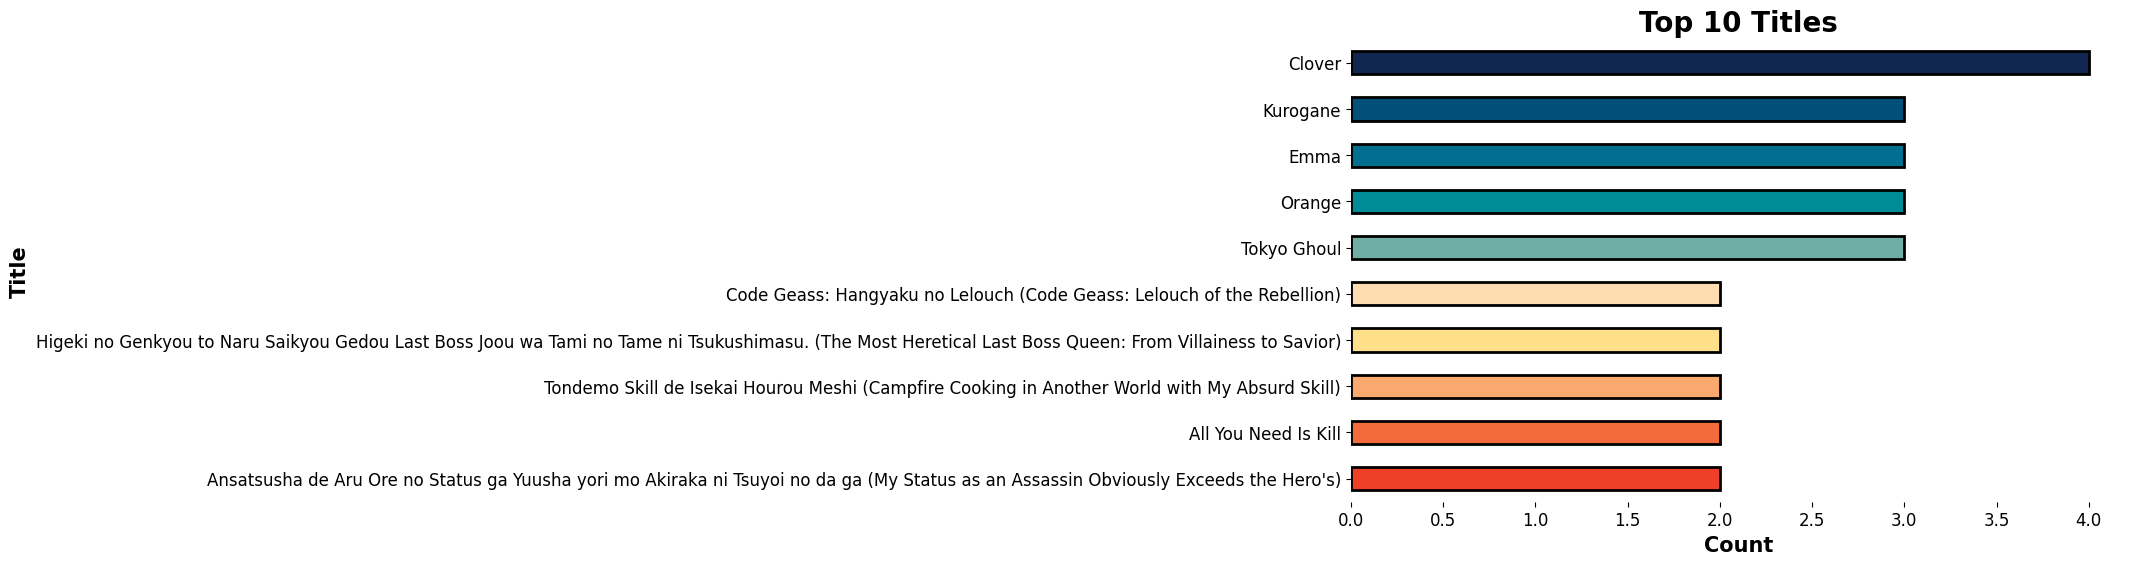

In [27]:
top_10_titles = manga_df['Title'].value_counts().head(10)

color = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]

top_10_titles.plot(kind='barh', figsize=(10, 6), color=color, linewidth=2, edgecolor='k')
plt.title('Top 10 Titles', fontsize=20, color='k', weight='bold')
plt.xlabel('Count', fontsize=15, weight='bold')
plt.ylabel('Title', fontsize=15, weight='bold')
plt.tick_params(labelsize=12)
plt.gca().invert_yaxis()

sns.despine(left=True, bottom=True)
plt.show()

**`Status`** finished is the most common

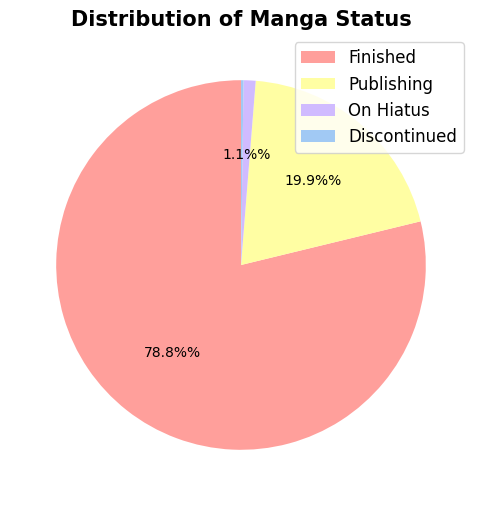

In [28]:
status_counts = manga_df['Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1']
plt.pie(status_counts, autopct=lambda pct: f'{pct:.1f}%%' if pct >= 1 else '', colors=colors, startangle=90)
plt.title('Distribution of Manga Status', fontsize=15, fontweight='bold')
plt.legend(status_counts.index, fontsize=12)
plt.show()


**Columns of Type List `Genres` and `Themes`**

Both `Genres` and `Themes` columns consist of classifications where each row is a list representing a combination of classifications. To analyze these columns, we will:

- Concatenate lists within each column.
- Calculate unique values `diff_vals` and the number of unique values `num_diff_vals` in each column.
- Calculate the missing rows ratio of each column.

In [29]:
list_col_dist_df = pd.DataFrame({'Genres': [.0] * 3,
                                 'Themes': [.0] * 3,
                                 'Author': [.0] * 3},
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

# Concatenate and find unique values
list_col_dist_df.loc['Distribution'] = manga_df[['Genres', 'Themes','Author']].apply(lambda col: pd.Series(col.sum()).value_counts().to_dict())

# Calculate the number of different values
list_col_dist_df.loc['Num_diff_vals'] = list_col_dist_df.loc['Distribution'].apply(len)

list_col_dist_df.loc['Missing_ratio'] = manga_df[['Genres', 'Themes','Author']].apply(lambda col: (col.apply(lambda x: len(x) == 0)).mean() * 100)

list_col_dist_df

,Genres,Themes,Author
Missing_ratio,27.142714,82.19822,0.0
Num_diff_vals,19,52,7226
Distribution,"{'Romance': 3089, 'Comedy': 2944, 'Drama': 235...","{'School': 825, 'Isekai': 249, 'Psychological'...","{'Tezuka Osamu': 59, 'Ryukishi07': 48, 'Itou J..."


*General view:*

+ About Missing_ratio:
     + `Genres` is missing a lot of data, missing **27%** of the data
     + `Themes` is missing almost all data, missing **82%** of the data
     + `Author` is full data (missing rate = 0%)
    
+ About Num_diff_vals, Diff_vals:
     + `Genres` has 19 types
     + `Themes` has 52 types
     + `Author` has 7226 different authors

Both `Genres` and `Themes` columns have a many unique values, so we will visualize the 10 most appearing values of these 2 columns.

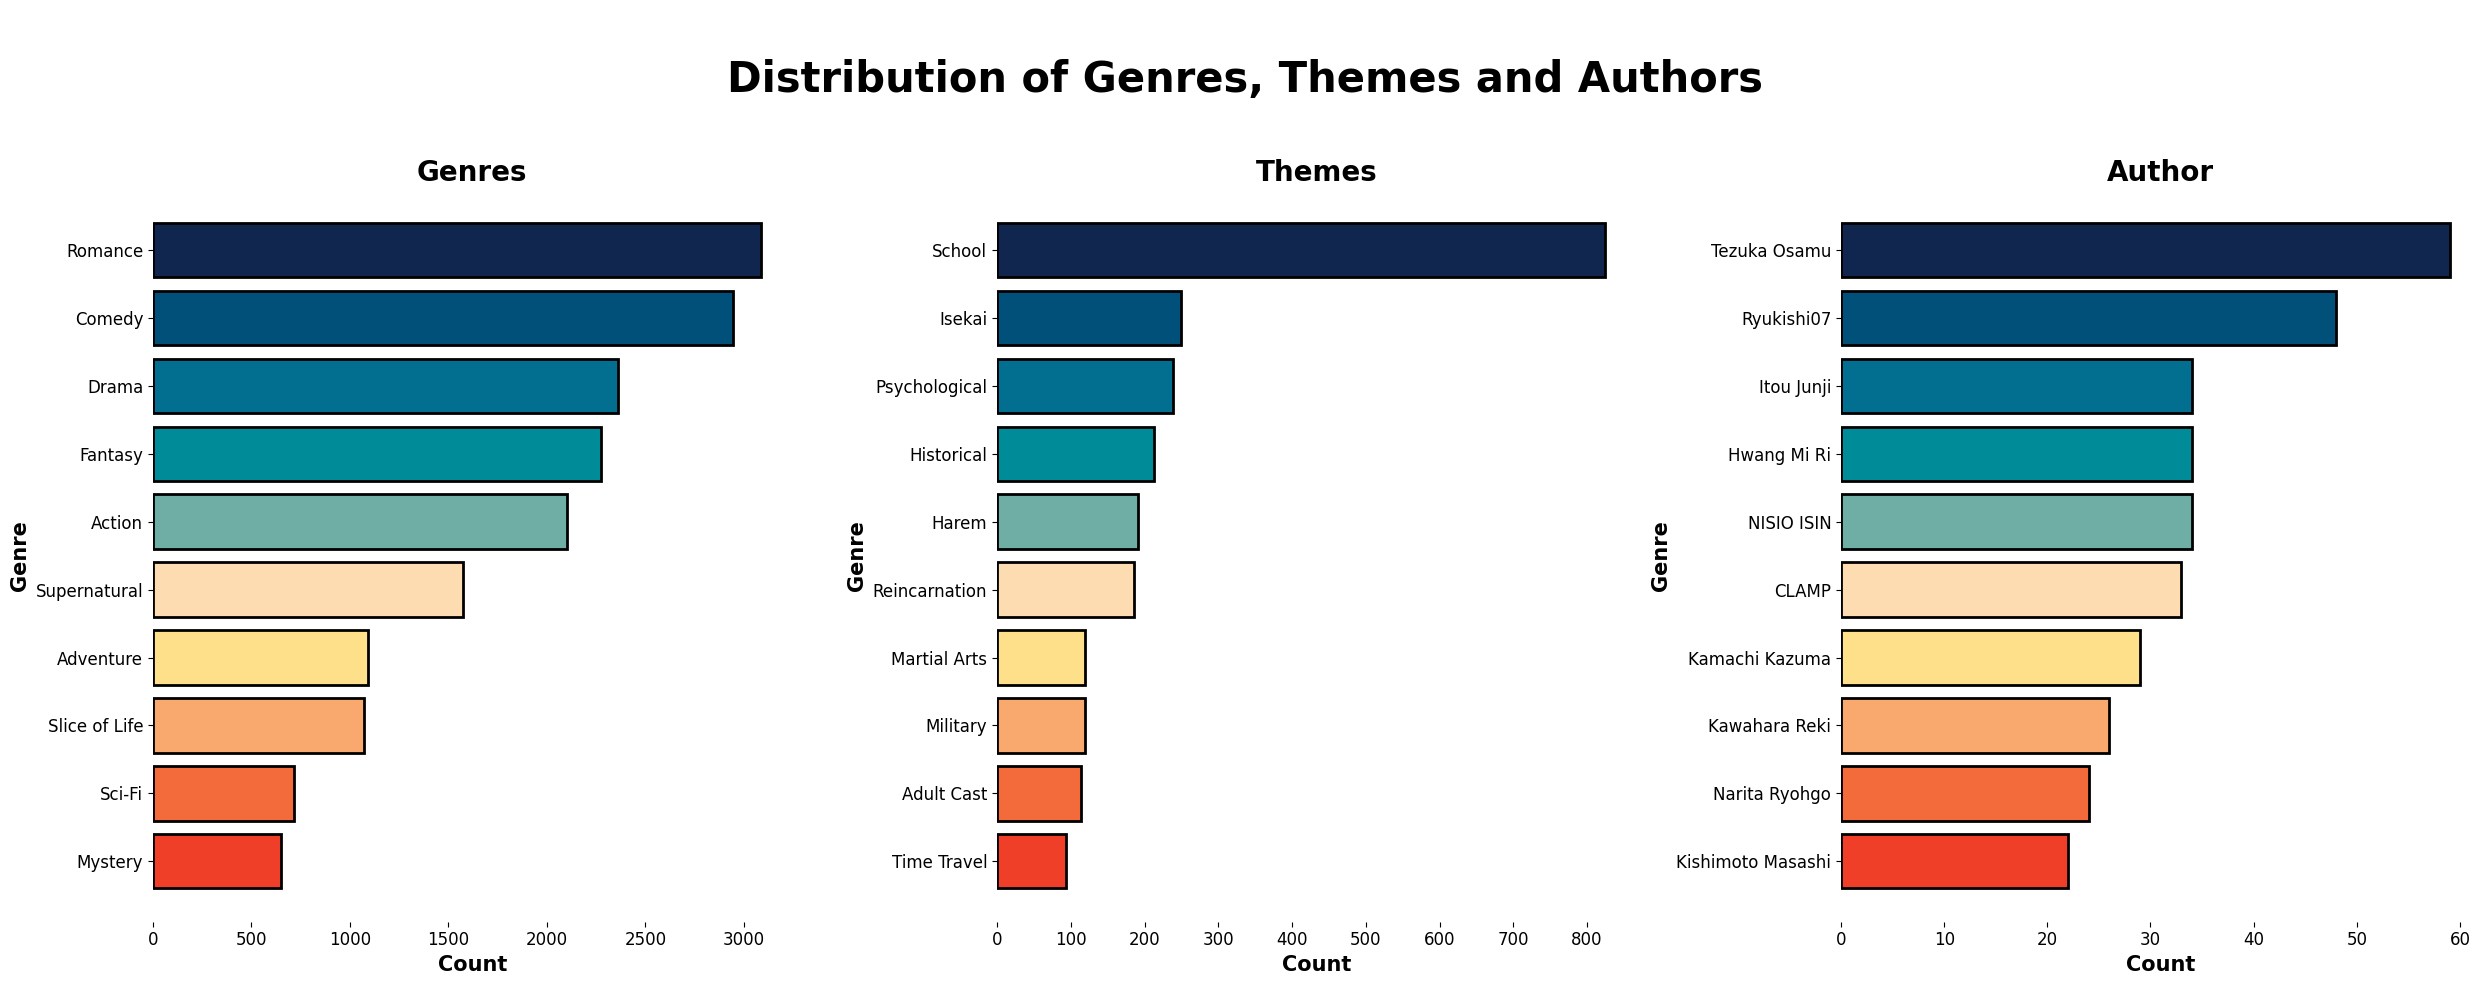

In [30]:
# visualize the distribution of genres and themes
genres = manga_df['Genres'].explode()
genres_counts = genres.value_counts().head(10)
themes = manga_df['Themes'].explode()
themes_counts = themes.value_counts().head(10)
author = manga_df['Author'].explode()
author_counts = author.value_counts().head(10)

fig, ax = plt.subplots(1, 3, figsize=(25, 10))
fig.suptitle('\nDistribution of Genres, Themes and Authors\n', fontsize=30, fontweight='bold')
for i, (col, counts) in enumerate(zip(['Genres', 'Themes', 'Author'], [genres_counts, themes_counts, author_counts])):
    ax[i].barh(counts.index, counts, color=color, linewidth=2, edgecolor='k')
    ax[i].set_title(col, fontsize=20, fontweight='bold')
    ax[i].set_xlabel('Count', fontsize=15, weight='bold')
    ax[i].set_ylabel('Genre', fontsize=15, weight='bold')
    ax[i].tick_params(labelsize=12)
    ax[i].invert_yaxis()

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<a class = "anchor" id = "2.3"></a>
## <span style='color:#2B9C15 '> 2.3 Missing Values, Abnormal Values and Outliers </span>

### 👉 **Missing Values** <a class = "anchor" id = "2.3.1"></a>

Theo quá trình khám phá dữ liệu ở trên, ta nhận thấy trong dataset tồn tại các giá trị thiếu (missing values). Vì vậy, ta cần thực hiện các bước sau :

- Tính tỉ lệ giá trị thiếu của mỗi cột và trực quan hóa bằng biểu đồ cột
- Drop các cột có tỉ lệ giá trị thiếu lớn hơn 75%
- Xem xét giá trị thiếu ở các dòng và xử lí chúng


Due to among the columns with numeric data, there are columns `Release date` and columns `Completed date` with special data type **`datetime`**, so these two columns will be handled missing value separately.

For the remaining columns, our strategy is to drop any column where the percentage of missing values exceeds 75%

#### 👉 **Missing Values per Column**

We will save missing ratios of all the columns calculated above into DataFrame `missing_ratio_df` and visualize them in a bar chart.

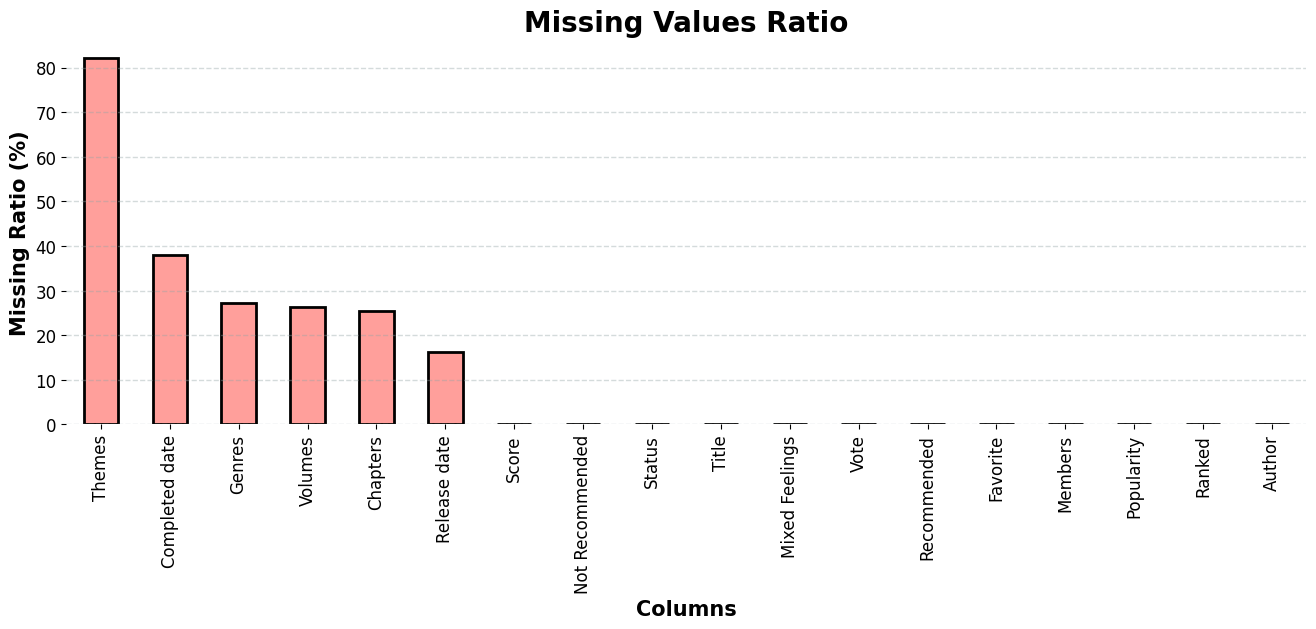

In [31]:
missing_ratio_df = pd.concat([num_col_dist_df.loc['missing ratios'], str_col_dist_df.loc['Missing_ratio'], list_col_dist_df.loc['Missing_ratio']], axis=0)
missing_ratio_df = missing_ratio_df.sort_values(ascending=False)
missing_ratio_df.plot(kind='bar', figsize=(16, 5), color='#ff9f9b', linewidth=2, edgecolor='k')
plt.title('Missing Values Ratio', fontsize=20, fontweight='bold')
plt.xlabel('Columns', fontsize=15, weight='bold')
plt.ylabel('Missing Ratio (%)', fontsize=15, weight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [32]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict, threshold: float = 75.0) -> pd.DataFrame:
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # List to maintain the columns to drop
    cols_to_trim = []
    
    for key, value in missing_lst.items():
        if float(value) > threshold:
            cols_to_trim.append(key)
            
    if len(cols_to_trim) > 0:
        # drop the columns identified using the dataframe drop() method
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped columns: " + " ".join(cols_to_trim))
    else:
        print("[LOG] Have no columns to trim.")
        
    return df_cp


In [33]:
manga_df = drop_missing_features(manga_df, missing_ratio_df, threshold=75.0)
print(f'The shape of the DataFrame after dropping columns: {manga_df.shape}')

[LOG] Dropped columns: Themes
The shape of the DataFrame after dropping columns: (9999, 17)


#### 👉 **Missing Values per Row**

In [34]:
number_missing_per_row = manga_df.isna().sum(axis=1)
missing_per_row_df = pd.DataFrame({'Number of Rows': number_missing_per_row.value_counts().sort_index()})
missing_per_row_df.index.name = 'Number of Missing Values'
missing_per_row_df['Percentage'] = (missing_per_row_df['Number of Rows'] / manga_df.shape[0] * 100).round(2)
missing_per_row_df

,Number of Rows,Percentage
Number of Missing Values,,
0,4635,46.35
1,2029,20.29
2,1507,15.07
3,1763,17.63
4,65,0.65


Most rows in the dataset exhibit a minor number of missing values, ranging from 1 to 3, with a maximum of 4 missing values. Considering the total number of columns (17), this level of missing data is relatively insignificant. Therefore, in the subsequent steps, we will explore methods to handle these missing values instead of opting to drop the corresponding rows.

#### 👉 **Handle Missing Values**

After remove features which have large missing values, our dataframe still have missing values. We need to handle them before going to the next step.

These are the columns with missing values

In [35]:
missing_dict = {}

for col in manga_df.columns:
    if type(manga_df[col].iloc[0]) == list:
        missing_dict[col] = manga_df[col].apply(lambda x: len(x) == 0).sum() / manga_df.shape[0] * 100
    else:
        missing_dict[col] = manga_df[col].isna().sum() / manga_df.shape[0] * 100
        
missing_df = pd.DataFrame({'Missing Ratio (%)': missing_dict})
missing_df = missing_df.sort_values(by='Missing Ratio (%)', ascending=False)
missing_df = missing_df[missing_df['Missing Ratio (%)'] > 0]
missing_df

,Missing Ratio (%)
Completed date,38.073807
Genres,27.142714
Volumes,26.322632
Chapters,25.332533
Release date,16.201620


First, we will handle missing values of **`Release date`** and **`Completed date`** columns

We will categorize the missing values for these two columns into three scenarios, each requiring a distinct approach:

- **Case 1**: Both `Release date` and `Completed date` are missing.
- **Case 2**: Only `Release date` is missing
- **Case 3**: Only `Completed date` is missing

For Cases 1 and 2, we will handle them by dropping the rows with missing values. In Case 3, which occurs for manga that are not yet completed, we will fill in the `Completed date` column with the current date.

In [36]:
# Drop rows with missing values in the 'Release date' column
manga_df.dropna(subset=['Release date'], inplace=True)
# Fill today's date for the 'Completed date' column
manga_df['Completed date'].fillna(dt.now().date().strftime('%Y-%m-%d'), inplace=True)
print(f'The shape of the DataFrame after dropping rows: {manga_df.shape}')

The shape of the DataFrame after dropping rows: (8379, 17)


Next, we will process the **`Genres`** column.

Because this column is determined by the content of the story, missing values cannot be filled in with any other value. Therefore, we will delete rows with missing values of this column.

In [37]:
genres_missing = manga_df['Genres'].apply(lambda x: len(x) == 0).sum()
print(f'There are {genres_missing} rows with missing values in the Genres column')
manga_df = manga_df[manga_df['Genres'].apply(lambda x: len(x) > 0)]
print(f'The shape of the DataFrame after dropping rows: {manga_df.shape}')

There are 2251 rows with missing values in the Genres column
The shape of the DataFrame after dropping rows: (6128, 17)


With the last two columns **`Volumes`** and **`Chapters`**, we will fill in the median value in the missing values of these two columns.

In [38]:
def filling_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    if (df is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # Get the list of columns in the dataframe
    cols_list = list(df_cp.columns)
    
    # Exclude the category columns and datetime columns
    cols_list.remove("Title")
    cols_list.remove("Status")
    cols_list.remove("Genres")
    cols_list.remove("Author")
    cols_list.remove("Release date")
    cols_list.remove("Completed date")
    
    # Replace all None values with NaN, fillna only works on nans
    df_cp.fillna(value=np.nan, inplace=True)
    
    # Replace all NaN values with the median of the column values
    for col in cols_list:
        df_cp[col].fillna((df_cp[col].median()), inplace=True)
        
    return df_cp

In [39]:
manga_df = filling_missing_value(df=manga_df)
print(f'The shape of the DataFrame after filling missing values: {manga_df.shape}')

The shape of the DataFrame after filling missing values: (6128, 17)


As mentioned above about the two columns `Volumes` and `Chapters`, after handling missing values, we will convert them to the `int` data type for convenience in the next steps.

And finally, we will check again the data type, the number of non-null values of the columns in the dataset.

In [40]:
manga_df[['Volumes', 'Chapters']] = manga_df[['Volumes', 'Chapters']].astype('int64')
manga_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6128 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            6128 non-null   object        
 1   Score            6128 non-null   float64       
 2   Vote             6128 non-null   int64         
 3   Ranked           6128 non-null   int64         
 4   Popularity       6128 non-null   int64         
 5   Members          6128 non-null   int64         
 6   Favorite         6128 non-null   int64         
 7   Volumes          6128 non-null   int64         
 8   Chapters         6128 non-null   int64         
 9   Status           6128 non-null   object        
 10  Genres           6128 non-null   object        
 11  Author           6128 non-null   object        
 12  Recommended      6128 non-null   int64         
 13  Mixed Feelings   6128 non-null   int64         
 14  Not Recommended  6128 non-null   int64       

### 👉 **Abnormal Values and Outliers** <a class = "anchor" id = "2.3.2"></a>

We will use the **`describe()`** function again to calculate the summary statistics of the columns with numeric data types and see if there are any abnormal values.

In [41]:
manga_df.describe().round(2)

,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Recommended,Mixed Feelings,Not Recommended,Release date,Completed date
count,6128.00,6128.00,6128.00,6128.00,6128.00,6128.00,6128.00,6128.00,6128.00,6128.00,6128.00,6128,6128
mean,7.41,4494.51,4703.15,7798.49,11173.12,487.25,6.36,47.65,3.65,0.61,0.39,2011-10-23 18:15:30.548302848,2016-10-18 07:46:26.945169664
min,6.91,101.00,1.00,1.00,202.00,0.00,1.00,1.00,0.00,0.00,0.00,1950-01-15 00:00:00,1962-12-23 00:00:00
25%,7.10,349.75,2150.75,2419.75,1292.75,8.00,3.00,16.00,0.00,0.00,0.00,2007-10-09 18:00:00,2012-06-07 06:00:00
50%,7.31,906.00,4548.00,6189.00,3003.50,26.50,4.00,28.00,1.00,0.00,0.00,2012-10-11 12:00:00,2018-06-11 00:00:00
75%,7.61,2791.50,7210.25,11994.00,8037.50,105.00,7.00,46.00,3.00,1.00,0.00,2017-11-29 06:00:00,2023-12-13 00:00:00
max,9.47,400404.00,10004.00,32693.00,665300.00,122841.00,200.00,1957.00,280.00,56.00,112.00,2023-11-06 00:00:00,2023-12-13 00:00:00
std,0.40,17049.27,2910.39,6447.93,33290.38,3417.67,7.58,74.57,10.88,2.32,2.29,NaN,NaN


We observe that all columns have reasonable value ranges, and there is nothing unusual. Let's attempt to check a time constraint for the `Release date` and `Completed date `columns to see if there are any unreasonable values.

In [42]:
abnormal_date = manga_df[manga_df['Release date'] > manga_df['Completed date']]
if abnormal_date.empty:
    print('There are no abnormal dates')
else:
    print(f'There are {abnormal_date.shape[0]} rows with abnormal dates')
    print('We will drop those rows')
    manga_df = manga_df.drop(abnormal_date.index)
    print(f'After drop abnormal dates, there are {manga_df.shape[0]} rows left')


There are 1 rows with abnormal dates
We will drop those rows
After drop abnormal dates, there are 6127 rows left


Next, we will use **boxplot** to examine outliers of columns with numeric data types.

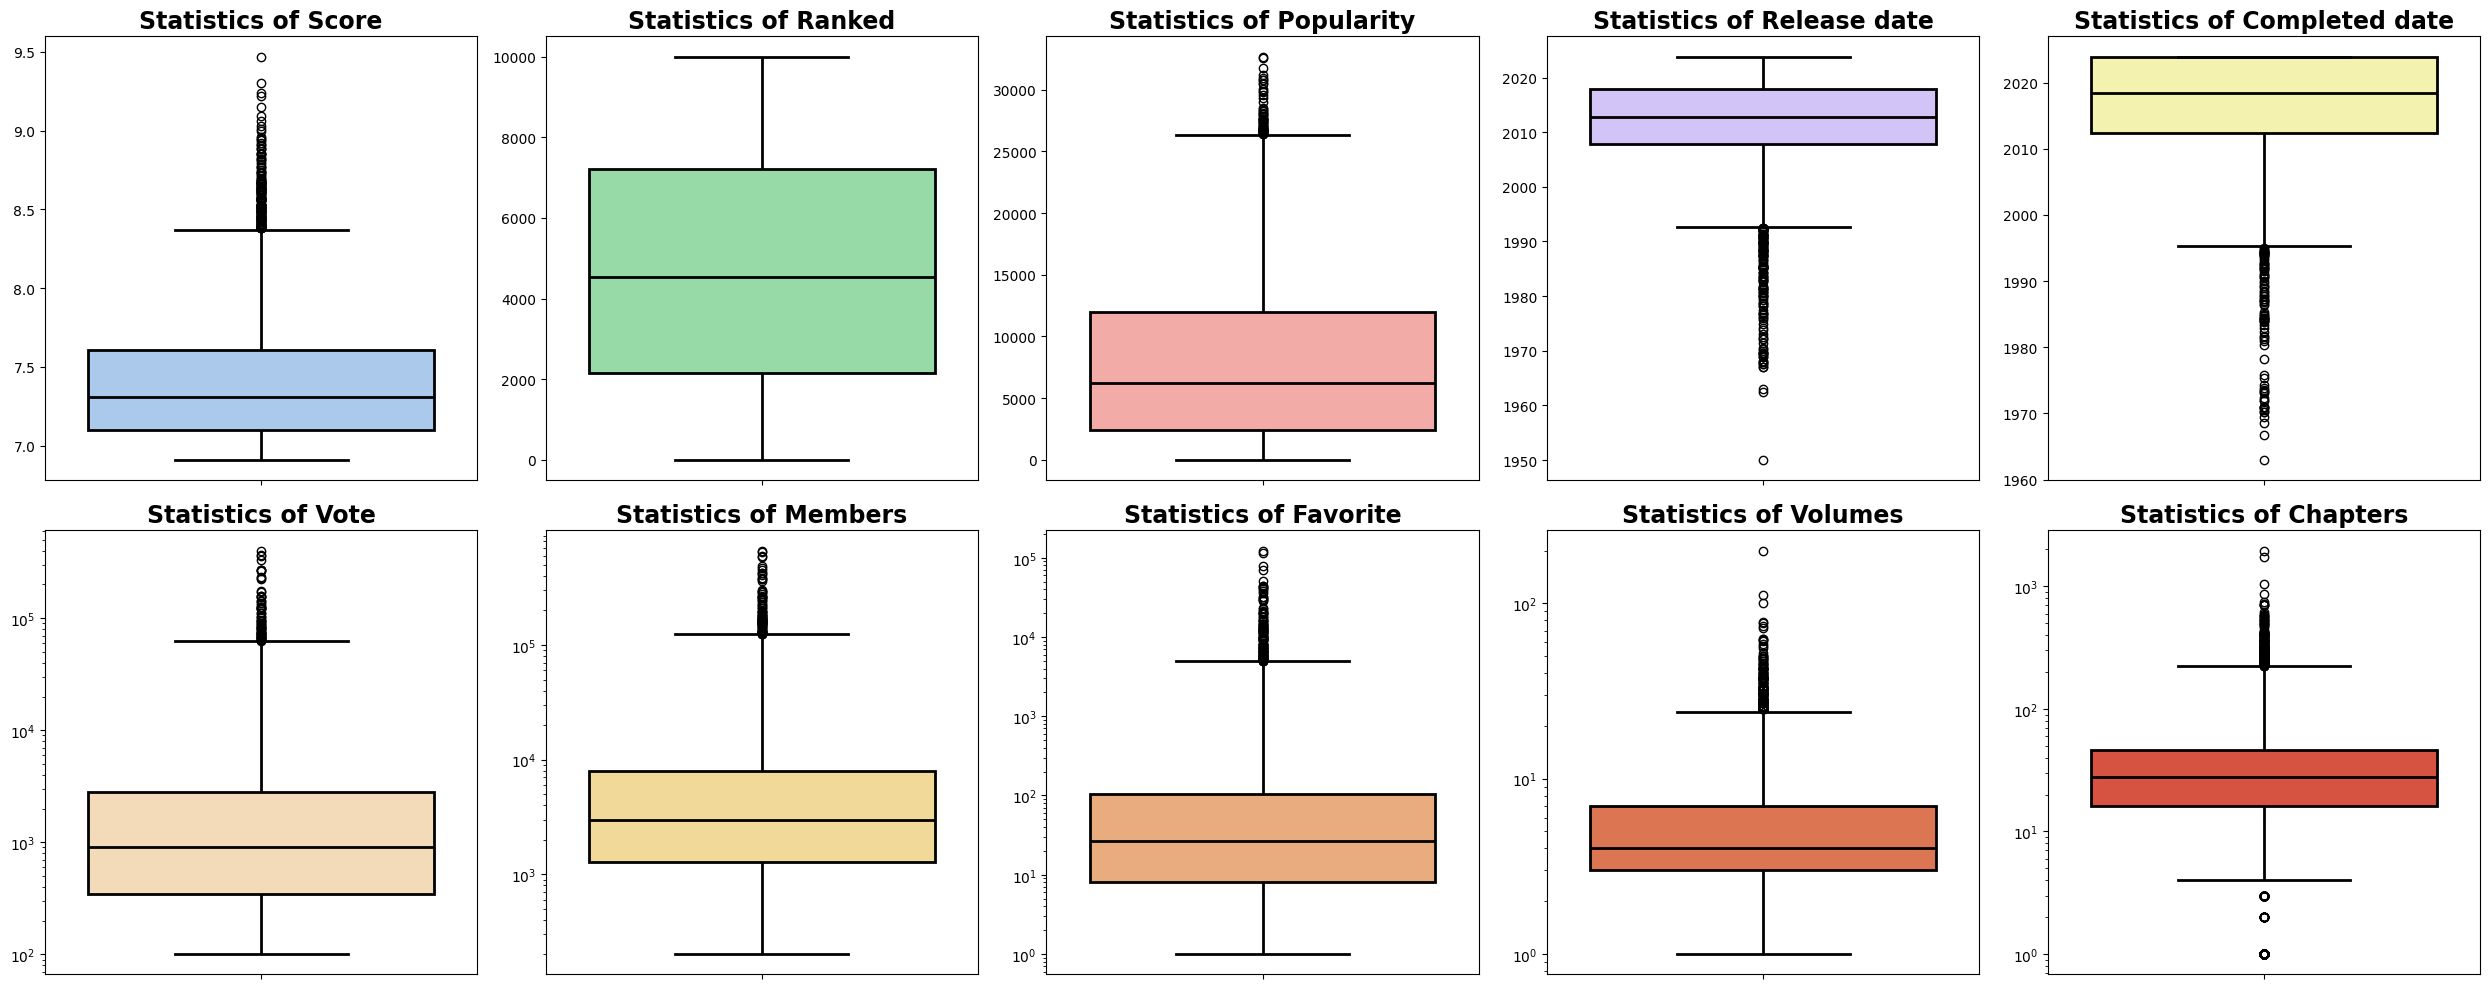

In [43]:
col = ['Score', 'Ranked', 'Popularity', 'Release date', 'Completed date', 'Vote','Members','Favorite','Volumes','Chapters']
#color = ['#a1c9f4', '#8de5a1', '#b9f2f0', '#d0bbff', '#fffea3', '#fffea3', '#d0bbff','#ff9f9b','#8de5a1','#a1c9f4']
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3','#fcdcb0','#FEE08B','#faa96e','#f36b3b','#ef3f28','#CC0028']
rows = 2
cols = 5

fig, ax = plt.subplots(rows, cols, figsize = (cols*5, rows*5))

for r in range(0, rows):
    for c in range(0, cols):
        i = r*cols + c
        if i < len(col):
            ax_i = ax[r,c]
            if i < 5:
                sns.boxplot(manga_df[col[i]], ax=ax_i, color=color[i], linecolor='black', linewidth=2)
            else:
                sns.boxplot(manga_df[col[i]], ax=ax_i, color=color[i], linecolor='black', linewidth=2, log_scale=True)
            ax_i.set_title(f"Statistics of {col[i]}", fontweight='bold', fontsize=17)
            ax_i.set(ylabel=None)
            ax_i.grid(False)
            
plt.tight_layout()

Although all columns have data points beyond the 1.5 IQR range, we will refrain from deleting these data points. As analyzed in the **Histogram** section, these columns have a wide distribution, and the data points outside the 1.5 IQR range represent values that, while very large, still fall within the reasonable value range for each respective column.

<a class = "anchor" id = "3"></a>

## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3. Data Visualization</div>

In this section, we will visualize about simple topics such as:
- Top 10 manga series with the highest score
- Top 10 longest-running manga series
- Top 10 most favorite manga series

<a class = "anchor" id = "3.1"></a>
## <span style='color:#2B9C15 '> 📕  Top 10 manga series with the highest score </span>

The purpose of asking for the `Top 10 manga based on Score` is likely to seek recommendations for high-quality manga titles that have received positive reviews or high scores from critics, readers, or community platforms. The term `Score` could refer to ratings or reviews assigned by users, critics, or aggregators on websites dedicated to manga.

In [44]:
top_10_manga = manga_df.nlargest(10, 'Score')
print(top_10_manga[['Title', 'Score','Ranked']])

                                              Title  Score  Ranked
0                                           Berserk   9.47       1
1   JoJo no Kimyou na Bouken Part 7: Steel Ball Run   9.30       2
2                                          Vagabond   9.24       3
3                                         One Piece   9.22       4
4                                           Monster   9.15       5
5                                         Slam Dunk   9.09       6
6                                      Vinland Saga   9.06       7
7                               Fullmetal Alchemist   9.03       8
9                 Oyasumi Punpun (Goodnight Punpun)   9.01      10
10                                          Kingdom   9.00      11


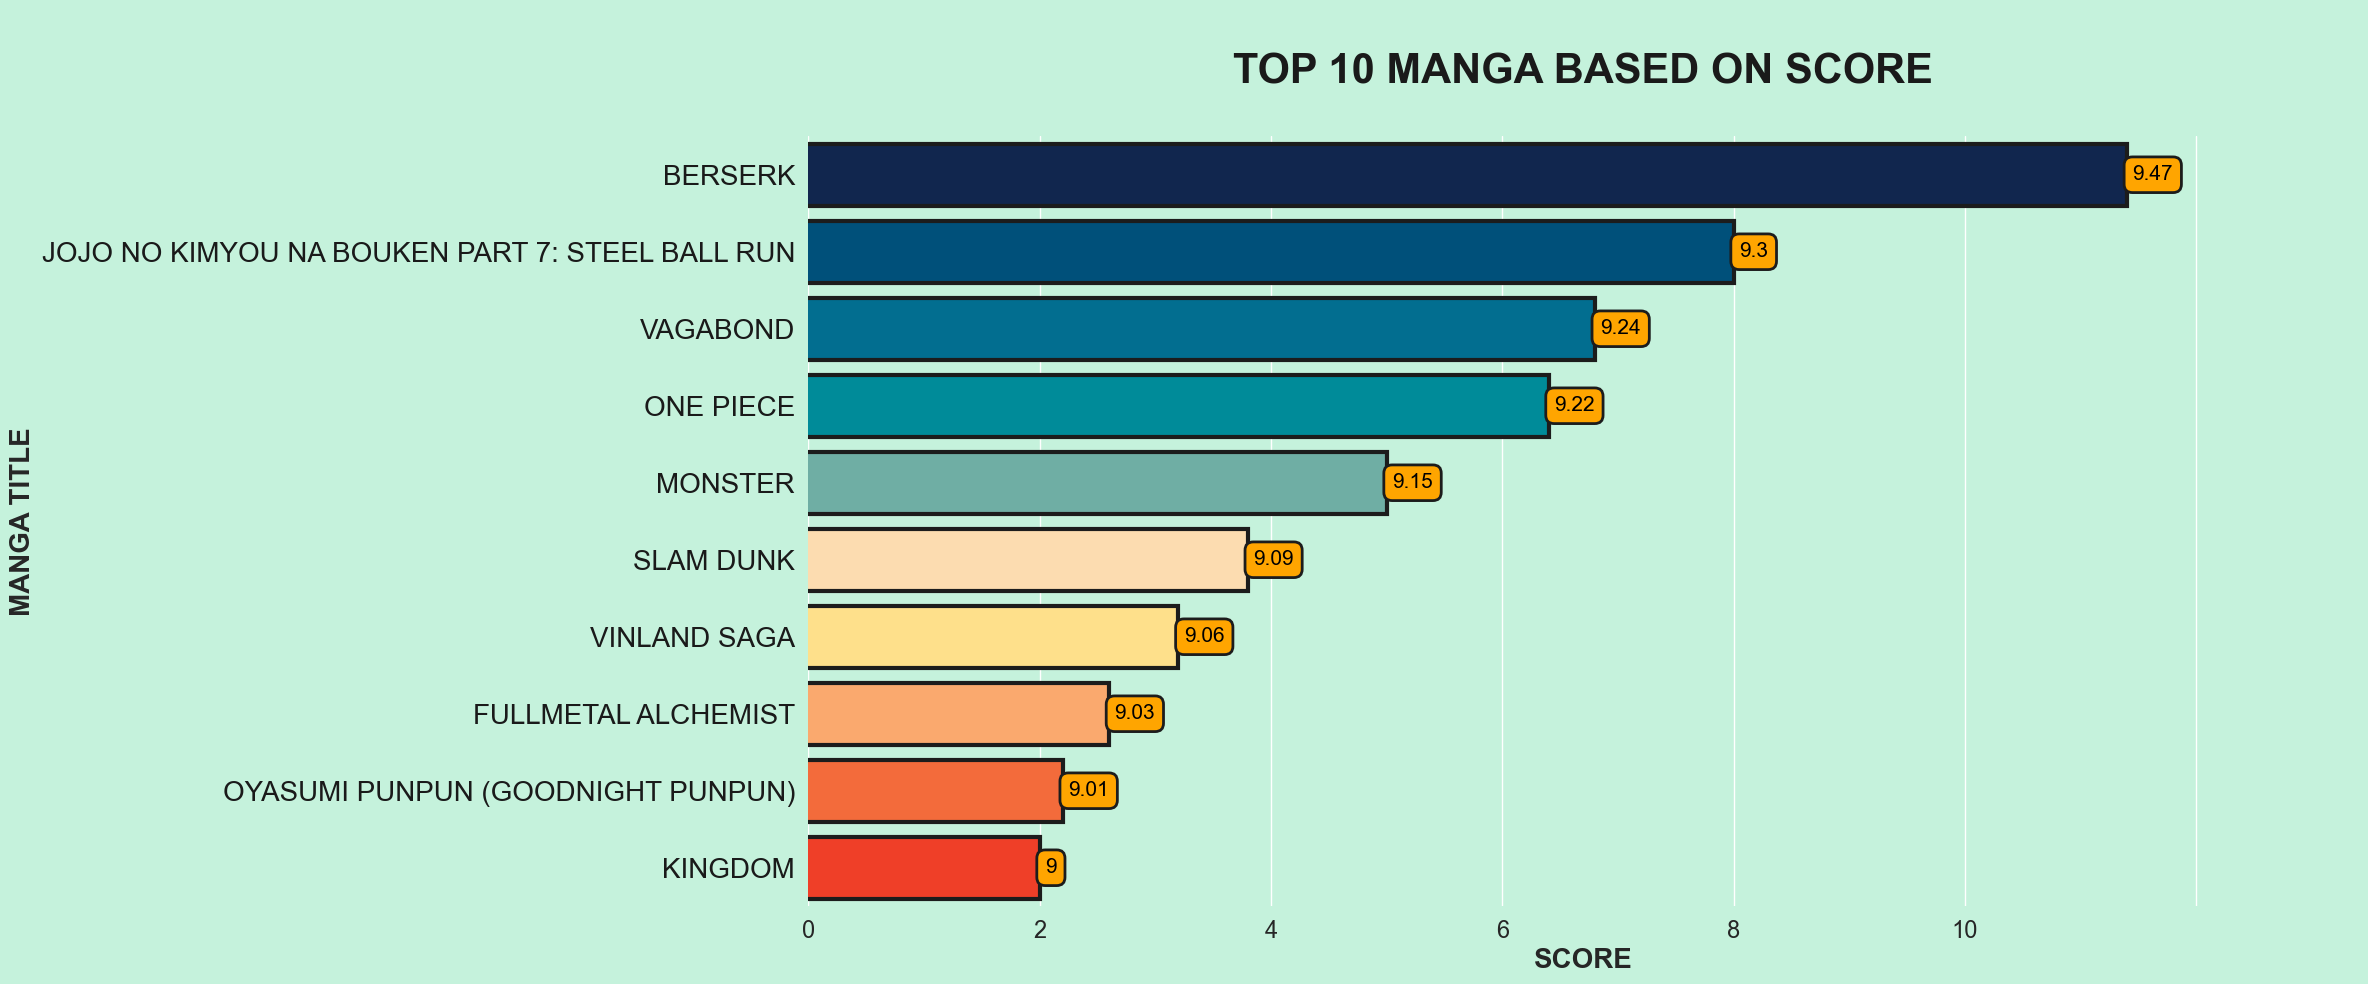

In [45]:
sns.set(rc={"axes.facecolor":"#c5f2dc","figure.facecolor":"#c5f2dc"})
palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))
p=sns.barplot(data=top_10_manga, y='Title', x='Score',palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 3)

p.axes.set_title("\nTOP 10 MANGA BASED ON SCORE\n",fontsize=30, color='k', weight='bold')
p.axes.set_xlabel("SCORE",fontsize=20, weight='bold')
p.axes.set_ylabel("MANGA TITLE",fontsize=20, weight='bold')

yticks = [i.upper() for i in top_10_manga['Title']]

p.axes.set_xticklabels(p.get_xticklabels(), fontsize=17)
p.axes.set_yticklabels(yticks, fontsize=20, color='k')

for container in p.containers:
    p.bar_label(container,label_type="edge",padding=4,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 2, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.xlim(min(top_10_manga['Score']) - 0.1, max(top_10_manga['Score']) + 0.1)
plt.show()

### 📖 **COMMENTS:**
+ The top 10 manga series encompass a wide range of genres, including action, adventure, drama, fantasy, mystery, supernatural, sports, and slice of life. This diversity suggests a broad appeal to readers with varying preferences.
+ All the listed manga have exceptionally high scores, indicating a consistent level of quality and popularity among the readers. Scores ranging from **9.00** to **9.47** demonstrate the overall excellence of these manga series.

 In summary, delving into the analysis of leading manga provides valuable insights for publishers, authors, and enthusiasts. Understanding the prevalent trends and preferences contributes to a comprehensive understanding of the dynamic landscape within the manga industry.

<a class = "anchor" id = "3.2"></a>
## <span style='color:#2B9C15 '> 📕  Top 10 longest-running manga series </span>


The question is asking for a list of the ten manga series that have been published over the longest periods of time, typically it's considered in terms of the number of years it has been in continuous publication, which reflects its popularity and enduring appeal.

In [46]:
df_copy = manga_df.copy()
df_copy['Release date'] = pd.to_datetime(df_copy['Release date'])
df_copy['Completed date'] = pd.to_datetime(df_copy['Completed date'])
days_diff = (df_copy['Completed date'] - df_copy['Release date']).dt.days
df_copy['Time from release (months)'] = days_diff / 30.44  # Average number of days in a month

top_10_manga = df_copy.nlargest(10, 'Time from release (months)')

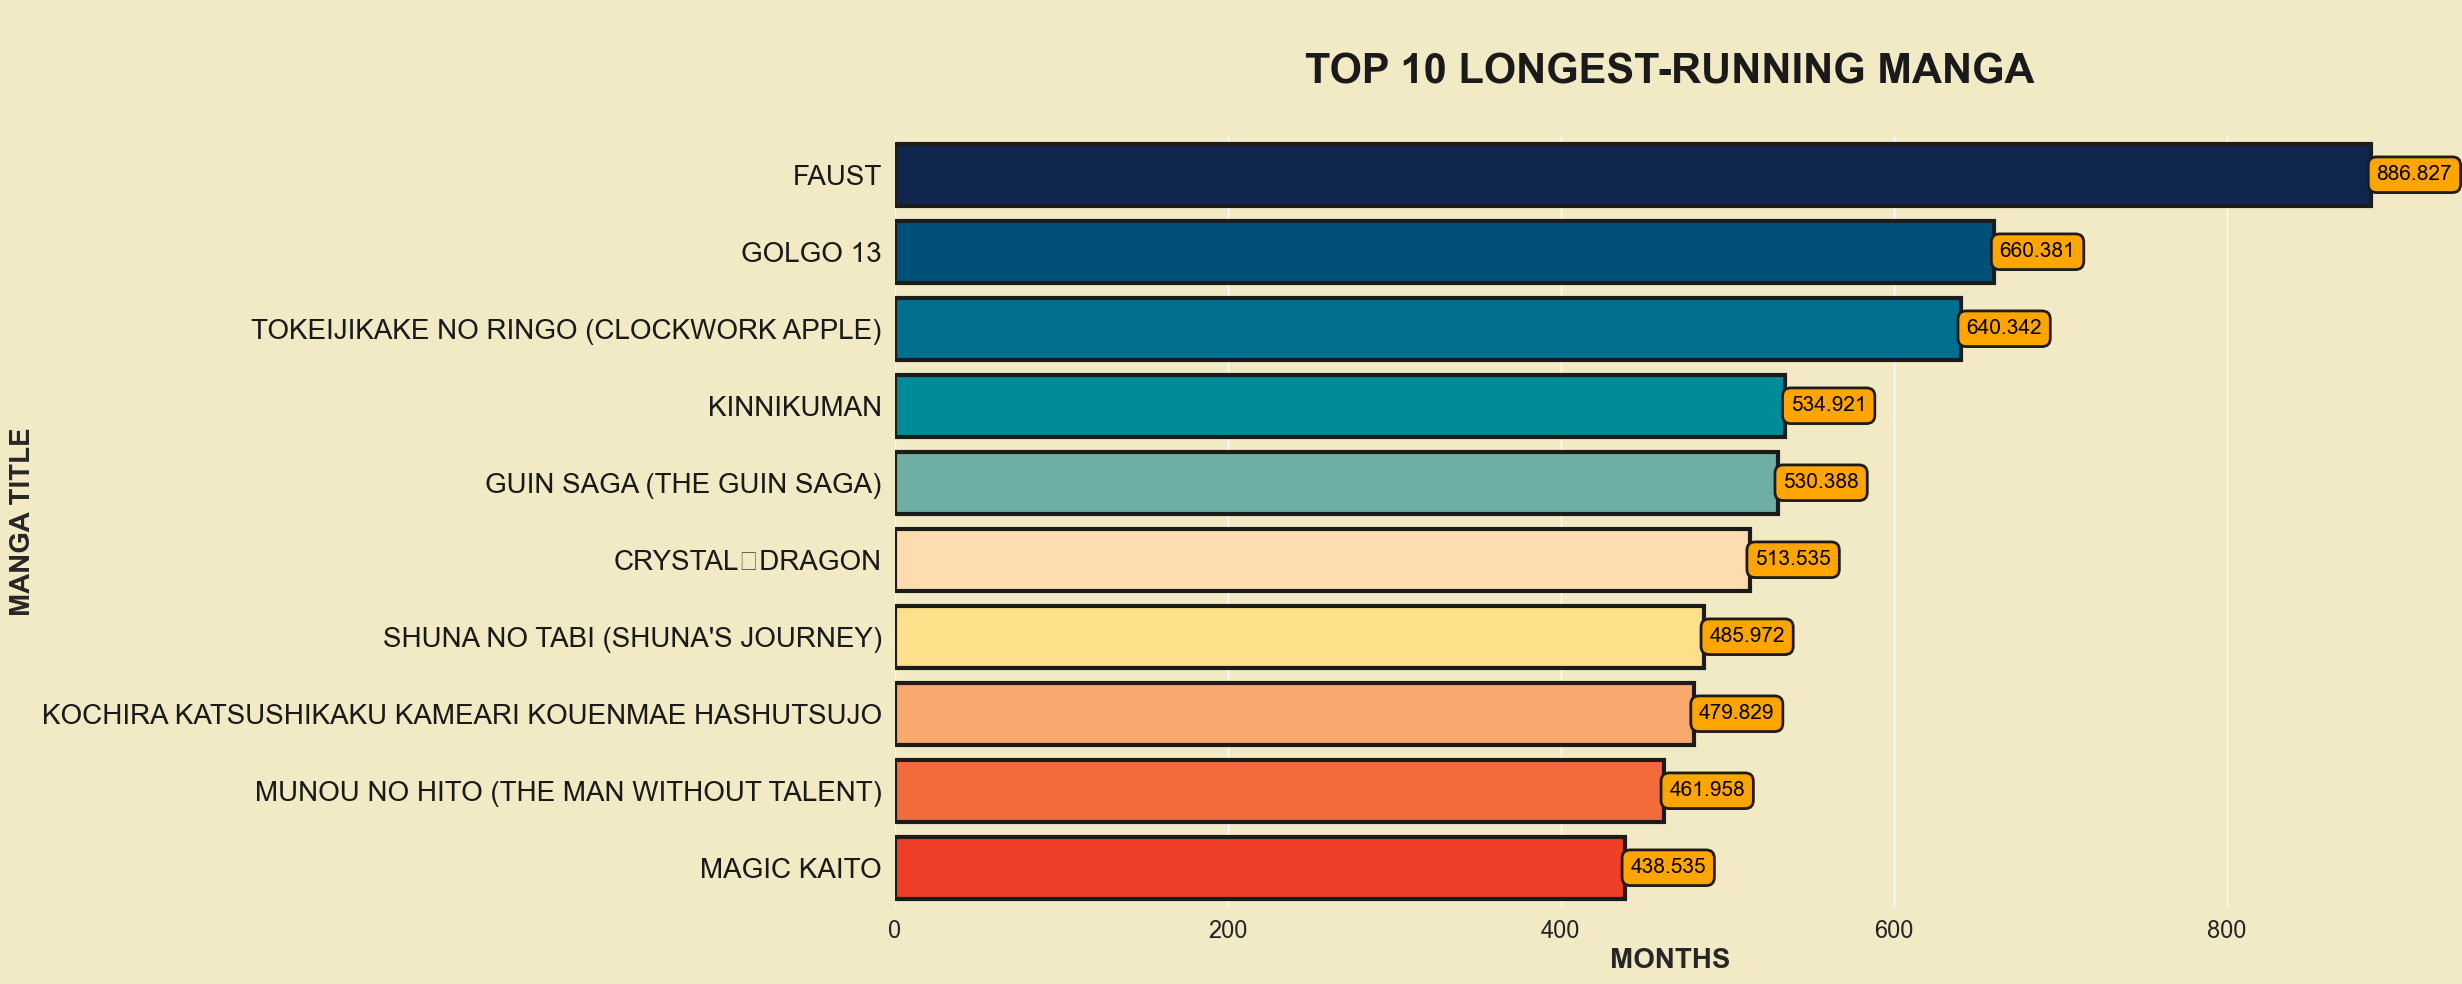

In [47]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))

p=sns.barplot(data=top_10_manga,y='Title',x='Time from release (months)',palette=palette,saturation=1,edgecolor = "#1c1c1c",linewidth = 3)

p.axes.set_title("\nTOP 10 LONGEST-RUNNING MANGA\n",fontsize=30, color='k', weight='bold')
p.axes.set_xlabel("MONTHS",fontsize=20, weight='bold')
p.axes.set_ylabel("MANGA TITLE",fontsize=20, weight='bold')

yticks = [i.upper() for i in top_10_manga['Title']]

p.axes.set_xticklabels(p.get_xticklabels(), fontsize=17)
p.axes.set_yticklabels(yticks, fontsize=20, color='k')

for container in p.containers:
    p.bar_label(container,label_type="edge",padding=4,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 2, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

### 📖 **COMMENTS:**
+ The graph highlights the remarkable longevity of certain manga series, with the top 10 having been in continuous publication for extended periods. This suggests a sustained interest and popularity among readers over the years.
+ `Faust` stands out as the longest-running manga series in terms of the time from release. This series has been in continuous publication for an impressive **887** months, indicating a substantial and lasting presence in the manga landscape.
+ Analyzing the longevity of manga series provides valuable insights into the trends and dynamics of the manga industry. It reflects not only the creativity of mangaka but also the ability of certain series to capture and maintain the interest of readers over an extended period.
+ The extended publication periods of these manga series suggest not only popularity but also a cultural impact. Manga with long publication histories often become ingrained in popular culture and may influence subsequent generations of manga creators.

In summary, the data on the top 10 longest-running manga series offers a glimpse into the enduring success and influence of certain titles in the manga industry. It reflects the diverse tastes of readers and the ability of certain series to stand the test of time.

<a class = "anchor" id = "3.3"></a>
## <span style='color:#2B9C15 '> 📕 Top 10 most favorite manga series  </span>


Analyzing the top 10 most favorite manga series is essential for understanding the dynamic landscape of the manga industry, guiding content creation, and making informed business decisions. It provides a comprehensive view of reader preferences, cultural influence, and market trends within the ever-evolving world of manga.

In [48]:
top_10_manga = manga_df.nlargest(10, 'Favorite')

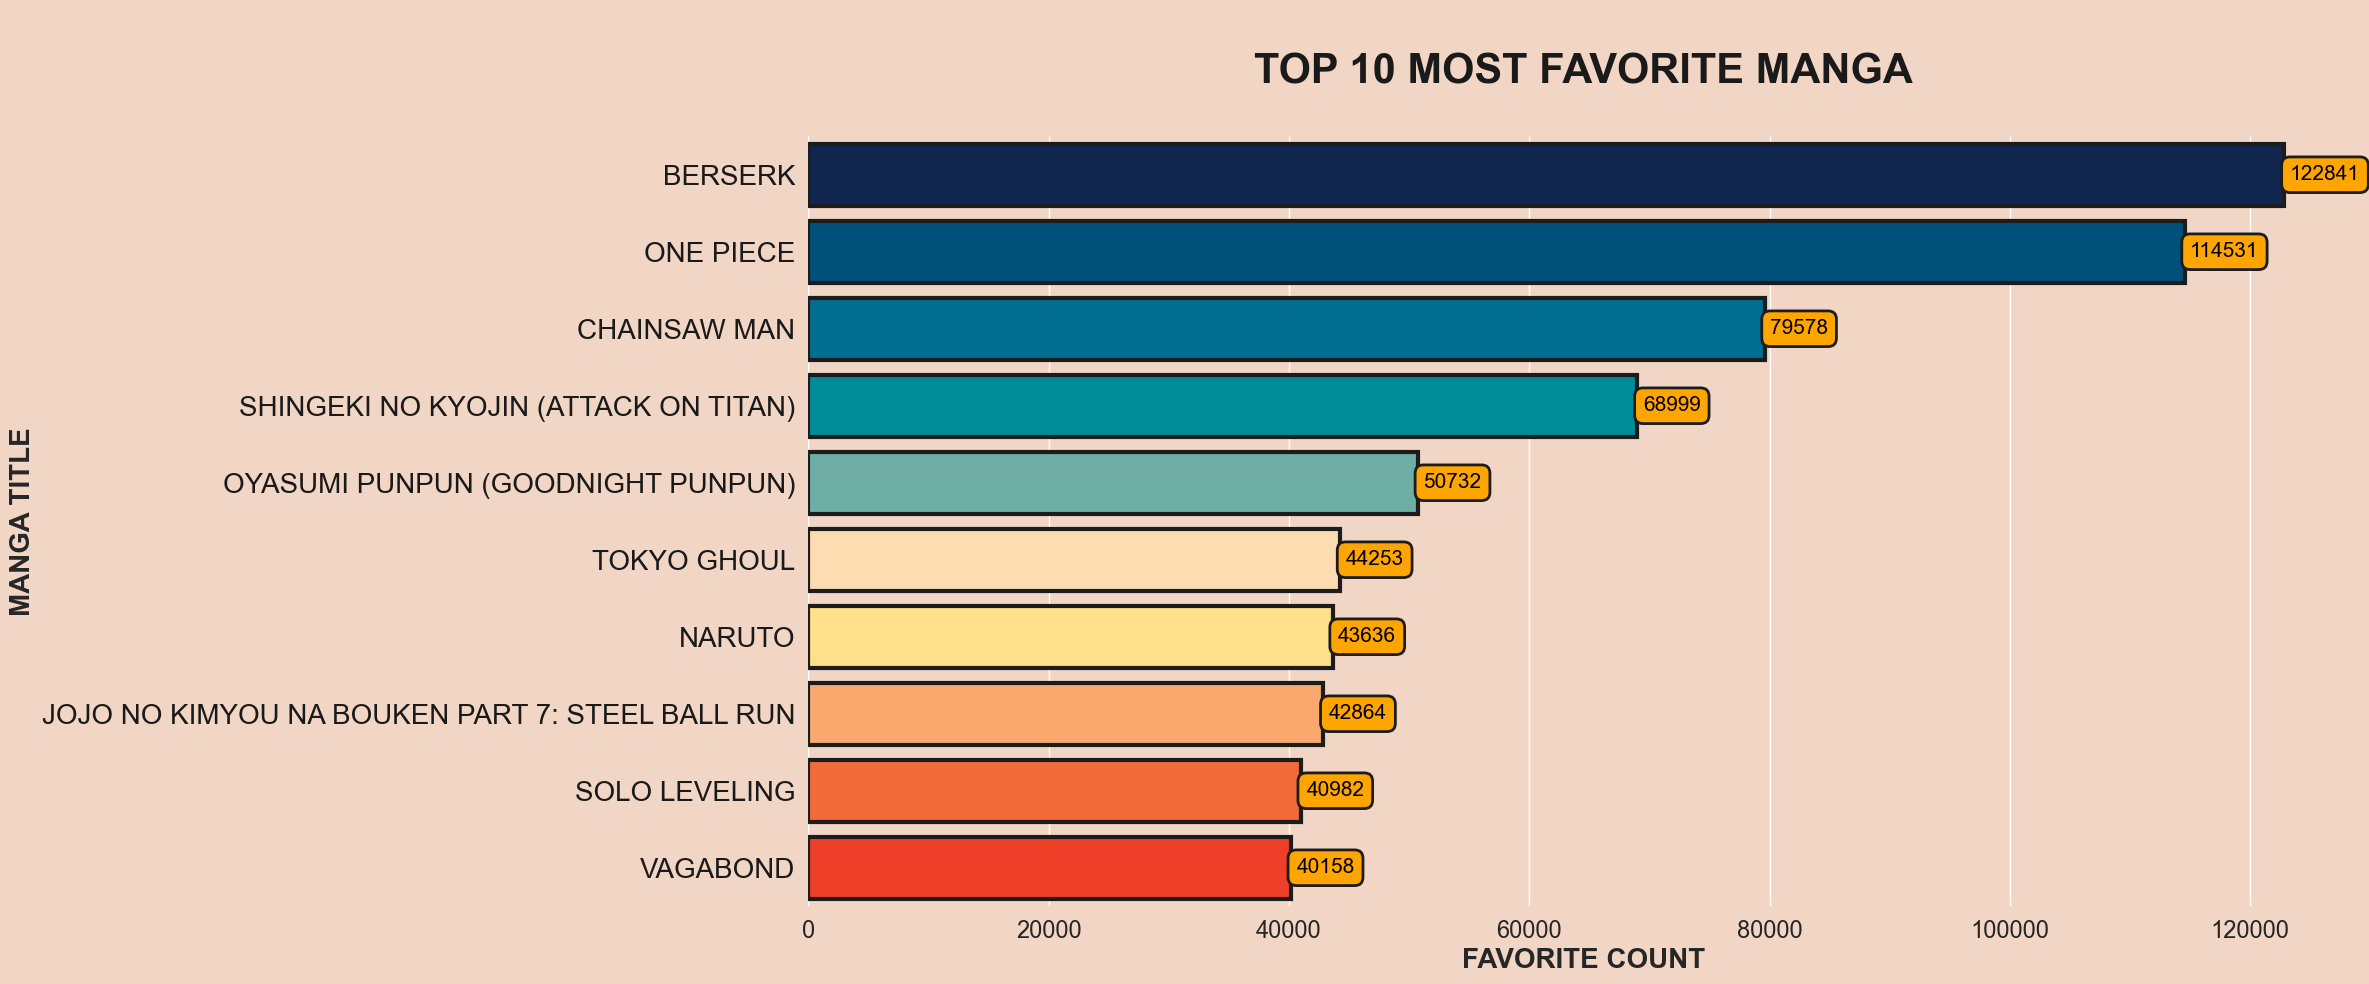

In [49]:
sns.set(rc={"axes.facecolor":"#f2d6c5","figure.facecolor":"#f2d6c5"})
palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))
p=sns.barplot(data=top_10_manga,y='Title',x='Favorite',palette=palette,saturation=1,edgecolor = "#1c1c1c",linewidth = 3)

p.axes.set_title("\nTOP 10 MOST FAVORITE MANGA\n",fontsize=30, color='k', weight='bold')
p.axes.set_xlabel("FAVORITE COUNT",fontsize=20, weight='bold')
p.axes.set_ylabel("MANGA TITLE",fontsize=20, weight='bold')

yticks = [i.upper() for i in top_10_manga['Title']]

p.axes.set_xticklabels(p.get_xticklabels(), fontsize=17)
p.axes.set_yticklabels(yticks, fontsize=20, color='k')

for container in p.containers:
    p.bar_label(container,label_type="edge",padding=4,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 2, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

### 📖 **COMMENTS:**
+ `Berserk` stands out as the clear leader in terms of favorites, with an exceptionally high count of **122,789**. This suggests an immense and dedicated fanbase, highlighting the series' impact and lasting appeal.
+ The high number of favorites reflects strong community engagement, with readers actively expressing their appreciation for these manga series. 

In summary, the data on the top 10 most favorite manga series provides valuable insights into reader preferences, the enduring popularity of certain series, and the diverse genres that captivate manga enthusiasts. Understanding these favorites is crucial for publishers, authors, and industry stakeholders seeking to engage with and cater to the preferences of the manga-reading community.

<a class = "anchor" id = "4"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">4. Summary </div>



## <span style='color:#2B9C15 '> 📕 Data Overview </span>


- The dataset consists of 10,000 rows and 16 columns, with each row representing information about a manga series in the top 10,000 on MyAnimeList.

- The `Published` column is split into two new columns: `Release date` and `Completed date`.

- Columns `Type Review` and `Total Review` are split into three new columns: `Recommended`, `Mixed Feelings`, and `Not Recommended`.

- Data types conversion:
    - Suitable Types: `Title`, `Score`, `Vote`, `Ranked`, `Popularity`, `Status`, and `Total Review`.
    - Convert data type of columns `Members`, `Favorite`, `Volumes`, and `Chapters` to **int**. (After handling missing values)
    - Convert data type of columns `Type Review`, `Genres`, `Themes`, and `Author` to **list**.
    - Convert data type of columns `Release date` and `Completed date` to **datetime**.


## <span style='color:#2B9C15 '> 📕 Data Distribution </span>

### 👉 Numerical Columns
Most numerical columns exhibit skewed or semi-normal distribution, reflecting the nature of the dataset sourced from the top 10,000 manga series on MyAnimeList.

### 👉 Categorical Columns

|**Name**|**Num_diff_vals**|
|:---|:---|
|`Title`|9684|
|`Status`|4|
|`Genres`|19|
|`Themes`|52|
|`Author`|7226|

### 👉 Missing Values

#### Missing Values per Column
|**Name**|**Missing_ratio**|
|:---|:---|
|`Volumes`|26.3%|
|`Chapters`|25.3%|
|`Release date`|16.2%|
|`Completed date`|38.07%|
|`Genres`|27%|
|`Themes`|82%|

#### Missing Values per Row
|**Number of Missing Values**|**Number of Rows**|
|:---|:---|
|0|6128|
|1|2029|
|2|1507|
|3|1763|
|4|65|

- Most rows in the dataset exhibit a minor number of missing values, ranging from 1 to 3, with a maximum of 4 missing values (out of 17 columns). Considering the total number of columns (17), this level of missing data is relatively insignificant.

#### Handle Missing Values
- Columns `Themes` and `Chapters` have missing values above the 75% threshold, so we drop `Themes`.
- For `Completed date`, fill missing values with the current date for ongoing manga, drop rows with missing values in both `Release date` and `Completed date`, and drop rows with missing values only in `Release date`.
- Drop rows with missing values in `Genres`.
- Fill missing values in `Volumes` and `Chapters` with the median.

### 👉 Abnormal Values and Outliers

- All columns have reasonable value ranges, and no abnormalities are detected.
- After checking time constraints for `Release date` and `Completed date`, one row with an unreasonable value is dropped.
- Outliers beyond the 1.5 IQR range are not removed due to the wide distribution of the columns, and these outliers fall within a reasonable value range for each respective column.

## <span style='color:#2B9C15 '> 📕 Data Visualization </span>

- Visualizations include the top 10 manga series with the highest score, the top 10 longest-running manga series, and the top 10 most favorite manga series.


## <span style='color:#2B9C15 '> 📕 After Data Exploration and Preprocessing </span>

- The dataset now contains 6128 rows and 17 columns, with each row representing information about a manga series in the top 10,000 manga series on MyAnimeList.
- The dataset has no missing values, no abnormal values, and no outliers.
- Data types of columns:

|**Name**|**Data Type**|
|:---|:---|
|`Title`|object|
|`Score`|float64|
|`Vote`|int64|
|`Ranked`|int64|
|`Popularity`|int64|
|`Members`|int64|
|`Favorite`|int64|
|`Volumes`|int64|
|`Chapters`|int64|
|`Status`|object|
|`Release date`|datetime64|
|`Completed date`|datetime64|
|`Genres`|object|
|`Author`|object|
|`Recommended`|int64|
|`Mixed Feelings`|int64|
|`Not Recommended`|int64|


<a class = "anchor" id = "5"></a>
## <div style="text-align: left; background-color:#EDC0C7; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">5. Save processed data </div>


In [50]:
manga_df.to_csv('../data/processed_comic.csv', index=False)

<div style="text-align: left; background-color:#EDC0C7; font-family:Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">END</div>